# Training Object couting Pipes

## Bước 1: Import các thư viện cần thiết

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

## Bước 2: Tải mô hình

In [ ]:
model = YOLO("./model/yolo11n.pt")

## Bước 3: Định nghĩa tham số huấn luyện

In [2]:
data_config = "./data.yaml"  # Đường dẫn đến tệp data.yaml của bạn
epochs = 100                # Số lượng epochs để huấn luyện
img_size = 640             # Kích thước hình ảnh cho quá trình huấn luyện

In [ ]:
results = model.train(data=data_config, epochs=epochs, imgsz=img_size, plots=True)  

## Bước 5: Phân tích kết quả huấn luyện

In [ ]:
import numpy as np

metrics = {
    'Epoch': [],
    'Box Loss': [],
    'Class Loss': [],
    'DFL Loss': [],
    'Precision': [],
    'Recall': [],
    'mAP50': [],
    'mAP50-95': []
}

# Trích xuất thông tin cho từng epoch
for epoch in range(epochs):
    # Truy cập thông tin từng epoch từ results
    epoch_results = results.results_dict  # Lấy từ điển kết quả
    metrics['Epoch'].append(epoch + 1)
    metrics['Box Loss'].append(epoch_results.get('box_loss', np.nan))  # Sử dụng np.nan nếu không có giá trị
    metrics['Class Loss'].append(epoch_results.get('cls_loss', np.nan))
    metrics['DFL Loss'].append(epoch_results.get('dfl_loss', np.nan))
    metrics['Precision'].append(epoch_results.get('precision', np.nan))
    metrics['Recall'].append(epoch_results.get('recall', np.nan))
    metrics['mAP50'].append(epoch_results.get('mAP50', np.nan))
    metrics['mAP50-95'].append(epoch_results.get('mAP50-95', np.nan))

In [ ]:
metrics_df = pd.DataFrame(metrics)

In [ ]:
# Lưu DataFrame vào tệp CSV
metrics_df.to_csv('training_metrics.csv', index=False)

## Bước 6: Vẽ biểu đồ cho các chỉ số huấn luyện

In [ ]:
# Vẽ biểu đồ loss
plt.figure(figsize=(12, 5))

In [ ]:
plt.subplot(1, 2, 1)  # Tạo trục con đầu tiên
plt.plot(metrics_df['Epoch'], metrics_df['Box Loss'], label='Box Loss Huấn Luyện', color='blue')
plt.title('Loss Huấn Luyện')
plt.xlabel('Epochs')
plt.ylabel('Box Loss')
plt.legend()

In [ ]:
# Vẽ biểu đồ mAP (Mean Average Precision)
plt.subplot(1, 2, 2)
plt.plot(metrics_df['epochs'], metrics_df['metrics/mAP_0.5'], label='mAP@0.5')
plt.plot(metrics_df['epochs'], metrics_df['metrics/mAP_0.5:0.95'], label='mAP@0.5:0.95')
plt.title('Mean Average Precision')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.legend()

In [ ]:
plt.tight_layout()
plt.show()

## Bước 7: Lưu kết quả

In [ ]:
model.save('training_results.pth')  # Lưu mô hình đã huấn luyện
metrics_df.to_csv('training_history.csv', index=False)  # Lưu lịch sử huấn luyện

## Bước 8 Test thử

In [19]:
import cv2

# Tải mô hình đã huấn luyện
model = YOLO("./training_results_2m.pt")  # Đảm bảo đường dẫn đúng và đuôi tệp là .pt

# Đọc ảnh
image_path = './datasets/train/images/P1370084_JPG.rf.b55a4fb6d11a1288c25e5f3c7286e893.jpg'  # Thay đổi đường dẫn tới ảnh của bạn
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Dự đoán
results_model = model(image_rgb)

# Hiển thị kết quả
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')

# Vẽ bounding boxes và đếm số lượng đối tượng
detected_boxes = results_model[0].boxes  # Lấy các bounding box từ kết quả

for box in detected_boxes:
    # Lấy thông tin từ box
    x1, y1, x2, y2 = box.xyxy[0].tolist()  # Tọa độ
    conf = box.conf[0].item()  # Độ tin cậy
    cls = int(box.cls[0].item())  # Lớp

    # Vẽ bounding box
    cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image_rgb, f'Class: {cls}, Conf: {conf:.2f}', 
                (int(x1), int(y1) - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Hiển thị ảnh với bounding boxes
print(f'Detected Objects: {len(detected_boxes)}')


# Lưu ảnh với bounding boxes
output_image_path = 'output.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
print(f"Saved output image to {output_image_path}")


0: 480x640 1 TYPE 1 - P05, 48.9ms
Speed: 4.5ms preprocess, 48.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Detected Objects: 1
Saved output image to output.jpg


# Chạy thêm tăng cường

In [3]:
model = YOLO("./training_results_2.pt")

In [4]:
results = model.train(
    data=data_config,        # Đường dẫn đến tập dữ liệu
    epochs=epochs,           # Số lượng epoch
    plots=True,              # Vẽ biểu đồ
    batch=3,                 # Kích thước batch (giảm từ 16 xuống 4)
    workers=3,               # Số lượng worker (giảm xuống 2)
    amp=True                 # Kích hoạt Mixed Precision
)

Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
engine/trainer: task=detect, mode=train, model=./training_results_2.pt, data=./data.yaml, epochs=40, time=None, patience=100, batch=3, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=3, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /mnt/d/Tinhtoansongsong/datasets/train/labels.cache... 6968 images, 0 backgrounds, 1 corrupt: 100%|██████████| 6968/6968 [00:00<?, ?i

train: WARNING ⚠️ /mnt/d/Tinhtoansongsong/datasets/train/images/P1060017_JPG.rf.b8ad88f3bca94ae8d54cfa5ced4a56f2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0026708]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12067, len(boxes) = 129674. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /mnt/d/Tinhtoansongsong/datasets/valid/labels.cache... 905 images, 0 backgrounds, 0 corrupt: 100%|██████████| 905/905 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1200, len(boxes) = 25441. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0004921875), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 3 dataloader workers
Logging results to runs/detect/train22
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      1.61G      1.247     0.7352      1.137          1        640: 100%|██████████| 2323/2323 [15:09<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:12<00:00,  2.08it/s]


                   all        905      25441      0.809      0.768      0.812      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      1.42G      1.273     0.7476      1.151         23        640: 100%|██████████| 2323/2323 [15:29<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:08<00:00,  2.21it/s]


                   all        905      25441      0.754      0.786      0.814      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.14G      1.287     0.7526      1.157          5        640: 100%|██████████| 2323/2323 [16:38<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.13it/s]

                   all        905      25441      0.795      0.793        0.8      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      1.69G      1.303     0.7509       1.16         58        640: 100%|██████████| 2323/2323 [15:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:09<00:00,  2.17it/s]


                   all        905      25441      0.796      0.811      0.822      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      1.71G      1.283     0.7481      1.156          1        640: 100%|██████████| 2323/2323 [15:47<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:09<00:00,  2.17it/s]

                   all        905      25441      0.728      0.827      0.778      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      1.99G      1.288     0.7475      1.161         33        640: 100%|██████████| 2323/2323 [15:09<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.14it/s]


                   all        905      25441      0.803      0.708      0.786      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      1.67G      1.281     0.7453      1.155          7        640: 100%|██████████| 2323/2323 [15:29<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:07<00:00,  2.25it/s]

                   all        905      25441      0.768      0.795      0.802      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      1.73G      1.289     0.7439      1.159         69        640: 100%|██████████| 2323/2323 [14:56<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.14it/s]


                   all        905      25441       0.83      0.738      0.793      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      1.63G       1.26      0.732      1.152          1        640: 100%|██████████| 2323/2323 [14:49<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.15it/s]


                   all        905      25441      0.812       0.74       0.79      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      1.47G       1.29      0.731      1.155         51        640: 100%|██████████| 2323/2323 [16:29<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:09<00:00,  2.17it/s]


                   all        905      25441      0.842      0.727      0.797      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      1.53G      1.287     0.7244       1.16         11        640: 100%|██████████| 2323/2323 [14:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:14<00:00,  2.04it/s]

                   all        905      25441      0.782      0.731      0.767      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      1.39G      1.277     0.7149      1.149         29        640: 100%|██████████| 2323/2323 [14:52<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:09<00:00,  2.17it/s]


                   all        905      25441      0.768      0.796      0.804      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      1.51G      1.278     0.7095      1.152          4        640: 100%|██████████| 2323/2323 [14:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:06<00:00,  2.27it/s]

                   all        905      25441      0.775      0.775      0.813      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      1.53G      1.257     0.7056      1.147         55        640: 100%|██████████| 2323/2323 [14:55<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:11<00:00,  2.12it/s]


                   all        905      25441      0.839      0.738      0.792      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      1.48G      1.266     0.7066      1.148         28        640: 100%|██████████| 2323/2323 [16:29<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:14<00:00,  2.03it/s]


                   all        905      25441      0.838      0.719       0.79      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      1.69G      1.241     0.6991      1.135          2        640: 100%|██████████| 2323/2323 [15:25<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.14it/s]

                   all        905      25441      0.766      0.721      0.753       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.15G       1.26     0.6873       1.14         81        640: 100%|██████████| 2323/2323 [14:58<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:09<00:00,  2.16it/s]


                   all        905      25441      0.773      0.766       0.79      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      1.57G      1.246     0.6863      1.139          2        640: 100%|██████████| 2323/2323 [15:41<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:11<00:00,  2.11it/s]

                   all        905      25441      0.776       0.69      0.749      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      1.51G      1.232     0.6754       1.13          1        640: 100%|██████████| 2323/2323 [16:33<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:05<00:00,  2.29it/s]


                   all        905      25441      0.762      0.772      0.793      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      1.73G      1.243     0.6793      1.135          6        640: 100%|██████████| 2323/2323 [15:00<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.16it/s]


                   all        905      25441      0.843      0.748       0.81      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      1.49G      1.238     0.6883      1.135         47        640: 100%|██████████| 2323/2323 [15:36<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:16<00:00,  1.98it/s]


                   all        905      25441      0.867      0.745       0.82      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.08G      1.233     0.6759      1.127         48        640: 100%|██████████| 2323/2323 [16:52<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:15<00:00,  2.00it/s]

                   all        905      25441      0.872       0.73      0.841      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      1.47G       1.23     0.6694      1.127         19        640: 100%|██████████| 2323/2323 [15:46<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:12<00:00,  2.07it/s]

                   all        905      25441      0.763      0.793      0.847      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      1.57G      1.208     0.6691      1.124          2        640: 100%|██████████| 2323/2323 [16:10<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:12<00:00,  2.07it/s]

                   all        905      25441      0.826      0.745      0.821      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      1.54G      1.217     0.6731      1.124          2        640: 100%|██████████| 2323/2323 [16:50<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:12<00:00,  2.09it/s]

                   all        905      25441      0.763      0.798      0.842      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      1.76G      1.212     0.6532      1.128         50        640: 100%|██████████| 2323/2323 [16:20<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:12<00:00,  2.08it/s]


                   all        905      25441      0.805      0.762      0.808      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      1.64G      1.207     0.6688      1.119          9        640: 100%|██████████| 2323/2323 [16:30<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:14<00:00,  2.03it/s]


                   all        905      25441      0.851      0.748      0.826      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      1.38G      1.202     0.6566      1.121         46        640: 100%|██████████| 2323/2323 [16:37<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:11<00:00,  2.11it/s]

                   all        905      25441      0.818      0.753      0.811       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      1.64G      1.197     0.6491       1.12          0        640: 100%|██████████| 2323/2323 [17:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:18<00:00,  1.92it/s]


                   all        905      25441      0.778      0.786      0.839      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      1.51G      1.189     0.6531      1.114         20        640: 100%|██████████| 2323/2323 [16:45<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:11<00:00,  2.12it/s]

                   all        905      25441      0.838      0.752      0.835      0.489


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      1.04G      1.042     0.6078      1.087          1        640: 100%|██████████| 2323/2323 [16:45<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:12<00:00,  2.08it/s]

                   all        905      25441      0.781      0.769      0.815      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      1.26G      1.025     0.5965      1.081         51        640: 100%|██████████| 2323/2323 [16:33<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:13<00:00,  2.05it/s]

                   all        905      25441      0.817      0.767      0.826      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      1.27G      1.018     0.5917      1.081          1        640: 100%|██████████| 2323/2323 [16:26<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:13<00:00,  2.05it/s]

                   all        905      25441      0.814      0.759      0.819      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      1.31G      1.016     0.5778      1.074         49        640: 100%|██████████| 2323/2323 [16:20<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:13<00:00,  2.06it/s]


                   all        905      25441      0.784      0.775       0.82      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      1.39G      1.007     0.5797      1.071          1        640: 100%|██████████| 2323/2323 [16:36<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:11<00:00,  2.12it/s]

                   all        905      25441       0.81      0.763      0.823       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      1.04G      1.015     0.5759      1.073         43        640: 100%|██████████| 2323/2323 [16:33<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:13<00:00,  2.05it/s]


                   all        905      25441      0.795      0.763       0.82      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      1.15G     0.9995     0.5692      1.064         31        640: 100%|██████████| 2323/2323 [16:28<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:13<00:00,  2.06it/s]

                   all        905      25441        0.8      0.759      0.823      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40     0.996G     0.9934     0.5651      1.062          1        640: 100%|██████████| 2323/2323 [15:39<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:08<00:00,  2.20it/s]

                   all        905      25441      0.781      0.773      0.822      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      1.04G      1.002      0.572      1.071          1        640: 100%|██████████| 2323/2323 [16:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:13<00:00,  2.05it/s]

                   all        905      25441      0.815      0.755      0.822      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      1.04G     0.9994     0.5688      1.066          1        640: 100%|██████████| 2323/2323 [16:41<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:12<00:00,  2.08it/s]


                   all        905      25441      0.804      0.755      0.821      0.478

40 epochs completed in 11.460 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 5.5MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:09<00:00,  2.17it/s]


                   all        905      25441      0.763      0.793      0.847      0.491
          TYPE 1 - P05         99       5202      0.942      0.978      0.981      0.673
      TYPE 2 - IQA1425         23        307      0.661      0.896       0.87      0.416
      TYPE 2 - IQA1900        231      10179      0.778      0.601      0.715      0.298
      TYPE 2 - IQA3800         50       1355      0.749      0.804      0.845      0.489
       TYPE 2 - IQA950        337       6408      0.822      0.991      0.985      0.689
           TYPE 7 - L1         10        193      0.691      0.456      0.738      0.461
        TYPE2-IQA2750A        155       1797      0.696      0.826      0.795      0.414
Speed: 1.2ms preprocess, 19.5ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train22


data_config = "./data.yaml"  # Đường dẫn đến tệp data.yaml của bạn
epochs = 40                # Chạy thêm 20 epochs Số lượng epochs để huấn luyện
img_size = 640             # Kích thước hình ảnh cho quá trình huấn luyện

In [6]:
# model.save('training_results_3.pt') 
metrics_df.to_csv('training_history_3.csv', index=False)  # Lưu lịch sử huấn luyện

NameError: name 'metrics_df' is not defined

In [6]:
model = YOLO("./training_results_3.pt")

In [7]:
results = model.train(
    data=data_config,        # Đường dẫn đến tập dữ liệu
    epochs=epochs,           # Số lượng epoch
    plots=True,              # Vẽ biểu đồ
    batch=3,                 # Kích thước batch (giảm từ 16 xuống 4)
    workers=3,               # Số lượng worker (giảm xuống 2)
    amp=True                 # Kích hoạt Mixed Precision
)

New https://pypi.org/project/ultralytics/8.3.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
engine/trainer: task=detect, mode=train, model=./training_results_3.pt, data=./data.yaml, epochs=40, time=None, patience=100, batch=3, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=3, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning /mnt/d/Tinhtoansongsong/datasets/train/labels.cache... 6968 images, 0 backgrounds, 1 corrupt: 100%|██████████| 6968/6968 [00:00<?, ?i

train: WARNING ⚠️ /mnt/d/Tinhtoansongsong/datasets/train/images/P1060017_JPG.rf.b8ad88f3bca94ae8d54cfa5ced4a56f2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0026708]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12067, len(boxes) = 129674. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /mnt/d/Tinhtoansongsong/datasets/valid/labels.cache... 905 images, 0 backgrounds, 0 corrupt: 100%|██████████| 905/905 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1200, len(boxes) = 25441. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train24/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0004921875), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 3 dataloader workers
Logging results to runs/detect/train24
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      1.65G      1.211     0.6681      1.122          1        640: 100%|██████████| 2323/2323 [15:26<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:12<00:00,  2.07it/s]


                   all        905      25441      0.876      0.742      0.808      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      1.49G      1.232     0.6865      1.134         23        640: 100%|██████████| 2323/2323 [15:34<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:09<00:00,  2.17it/s]


                   all        905      25441      0.799      0.771      0.821      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.21G      1.247     0.6979      1.139          5        640: 100%|██████████| 2323/2323 [15:09<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:08<00:00,  2.20it/s]

                   all        905      25441      0.812      0.743      0.798      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      1.76G      1.257     0.7007       1.14         58        640: 100%|██████████| 2323/2323 [15:20<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:08<00:00,  2.22it/s]


                   all        905      25441      0.831      0.808      0.844      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      1.76G      1.242     0.6938       1.14          1        640: 100%|██████████| 2323/2323 [15:08<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:09<00:00,  2.17it/s]


                   all        905      25441      0.792      0.751      0.784      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.04G      1.248     0.7036      1.143         33        640: 100%|██████████| 2323/2323 [15:00<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.15it/s]

                   all        905      25441      0.768      0.772       0.82      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      1.73G      1.246     0.7054      1.138          7        640: 100%|██████████| 2323/2323 [15:13<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:09<00:00,  2.16it/s]


                   all        905      25441      0.793      0.775      0.816       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      1.78G      1.254     0.7009      1.143         69        640: 100%|██████████| 2323/2323 [15:17<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.15it/s]


                   all        905      25441      0.807      0.765        0.8      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40       1.7G      1.226      0.689      1.137          1        640: 100%|██████████| 2323/2323 [15:07<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:11<00:00,  2.12it/s]

                   all        905      25441      0.833      0.742      0.789      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      1.54G      1.257     0.6929       1.14         51        640: 100%|██████████| 2323/2323 [15:36<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:08<00:00,  2.21it/s]

                   all        905      25441      0.805      0.742      0.794      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      1.58G      1.251     0.6866      1.146         11        640: 100%|██████████| 2323/2323 [15:16<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:12<00:00,  2.09it/s]

                   all        905      25441       0.85      0.733      0.767      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      1.46G      1.244     0.6799      1.135         29        640: 100%|██████████| 2323/2323 [15:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:09<00:00,  2.16it/s]

                   all        905      25441       0.83      0.747      0.811      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      1.57G      1.245     0.6782      1.138          4        640: 100%|██████████| 2323/2323 [14:56<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:14<00:00,  2.02it/s]

                   all        905      25441      0.765      0.795       0.83      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      1.58G      1.226     0.6758      1.132         55        640: 100%|██████████| 2323/2323 [15:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:09<00:00,  2.16it/s]

                   all        905      25441      0.757       0.81      0.821      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      1.54G      1.236     0.6735      1.135         28        640: 100%|██████████| 2323/2323 [14:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:14<00:00,  2.03it/s]


                   all        905      25441      0.777      0.823      0.863      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      1.76G      1.211     0.6691      1.124          2        640: 100%|██████████| 2323/2323 [15:20<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:11<00:00,  2.12it/s]


                   all        905      25441      0.778      0.814      0.828      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.22G       1.23     0.6608      1.128         81        640: 100%|██████████| 2323/2323 [15:27<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.15it/s]

                   all        905      25441      0.757       0.78      0.813      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      1.64G      1.215     0.6582      1.125          2        640: 100%|██████████| 2323/2323 [15:08<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:16<00:00,  1.98it/s]

                   all        905      25441      0.759      0.809      0.803      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      1.57G      1.205     0.6523       1.12          1        640: 100%|██████████| 2323/2323 [15:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:12<00:00,  2.07it/s]

                   all        905      25441      0.747      0.817      0.818      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      1.79G      1.214     0.6544      1.124          6        640: 100%|██████████| 2323/2323 [15:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:13<00:00,  2.06it/s]


                   all        905      25441      0.783      0.794      0.848      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      1.57G      1.213     0.6635      1.125         47        640: 100%|██████████| 2323/2323 [15:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:13<00:00,  2.07it/s]


                   all        905      25441      0.831      0.761      0.833      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.15G      1.209     0.6548      1.118         48        640: 100%|██████████| 2323/2323 [15:25<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:12<00:00,  2.08it/s]


                   all        905      25441      0.812      0.814      0.862      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      1.52G      1.205     0.6478      1.118         19        640: 100%|██████████| 2323/2323 [15:27<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:12<00:00,  2.09it/s]

                   all        905      25441      0.775      0.839      0.862      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      1.62G      1.187     0.6503      1.115          2        640: 100%|██████████| 2323/2323 [15:27<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:11<00:00,  2.12it/s]


                   all        905      25441      0.828      0.754      0.836      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40       1.6G        1.2     0.6558      1.116          2        640: 100%|██████████| 2323/2323 [15:16<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.14it/s]


                   all        905      25441       0.77      0.817      0.854      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      1.82G      1.196      0.639       1.12         50        640: 100%|██████████| 2323/2323 [15:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.13it/s]


                   all        905      25441      0.779      0.813      0.844      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40       1.7G      1.188     0.6531      1.112          9        640: 100%|██████████| 2323/2323 [15:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:11<00:00,  2.10it/s]


                   all        905      25441      0.829      0.752      0.832      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      1.43G      1.185      0.643      1.116         46        640: 100%|██████████| 2323/2323 [15:09<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:12<00:00,  2.09it/s]

                   all        905      25441      0.878      0.734      0.835      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40       1.7G      1.181     0.6343      1.114          0        640: 100%|██████████| 2323/2323 [15:39<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:08<00:00,  2.22it/s]

                   all        905      25441      0.852      0.757      0.849      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      1.57G      1.172     0.6395      1.107         20        640: 100%|██████████| 2323/2323 [15:29<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:11<00:00,  2.12it/s]

                   all        905      25441      0.854      0.752      0.842      0.496


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      1.11G      1.027     0.5921      1.079          1        640: 100%|██████████| 2323/2323 [15:38<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:09<00:00,  2.18it/s]


                   all        905      25441      0.771       0.78      0.829      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      1.32G       1.01     0.5835      1.073         51        640: 100%|██████████| 2323/2323 [15:34<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:07<00:00,  2.23it/s]


                   all        905      25441      0.853      0.744      0.832      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      1.33G      1.003     0.5778      1.074          1        640: 100%|██████████| 2323/2323 [15:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:11<00:00,  2.12it/s]

                   all        905      25441      0.853      0.734      0.828       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      1.37G      1.001     0.5664      1.068         49        640: 100%|██████████| 2323/2323 [15:27<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.14it/s]


                   all        905      25441      0.801      0.771      0.831      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      1.45G     0.9953     0.5717      1.065          1        640: 100%|██████████| 2323/2323 [15:07<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.16it/s]

                   all        905      25441      0.874      0.727      0.823      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40       1.1G      1.003     0.5632      1.068         43        640: 100%|██████████| 2323/2323 [15:23<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.14it/s]


                   all        905      25441      0.846      0.748      0.824      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      1.21G     0.9879     0.5586      1.059         31        640: 100%|██████████| 2323/2323 [15:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:07<00:00,  2.25it/s]

                   all        905      25441      0.849      0.744      0.825      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      1.06G     0.9835     0.5565      1.059          1        640: 100%|██████████| 2323/2323 [14:58<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.13it/s]

                   all        905      25441      0.843      0.742       0.82      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40       1.1G     0.9918     0.5622      1.067          1        640: 100%|██████████| 2323/2323 [15:16<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.14it/s]


                   all        905      25441      0.849      0.738      0.818      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      1.11G     0.9893     0.5596      1.062          1        640: 100%|██████████| 2323/2323 [15:27<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:11<00:00,  2.11it/s]

                   all        905      25441      0.848       0.74      0.819      0.485



40 epochs completed in 10.983 hours.
Optimizer stripped from runs/detect/train24/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train24/weights/best.pt, 5.5MB

Validating runs/detect/train24/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:10<00:00,  2.14it/s]


                   all        905      25441      0.811      0.813      0.862      0.504
          TYPE 1 - P05         99       5202      0.929      0.975       0.98      0.689
      TYPE 2 - IQA1425         23        307      0.677      0.889      0.833      0.396
      TYPE 2 - IQA1900        231      10179      0.866      0.584      0.737      0.307
      TYPE 2 - IQA3800         50       1355      0.778      0.787      0.854      0.489
       TYPE 2 - IQA950        337       6408      0.894      0.978      0.989      0.695
           TYPE 7 - L1         10        193      0.765      0.674      0.823      0.526
        TYPE2-IQA2750A        155       1797      0.769      0.807      0.815      0.423
Speed: 1.3ms preprocess, 17.8ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train24


In [8]:
model.save('training_results_4.pt') 

In [11]:

# Tải mô hình đã huấn luyện
model = YOLO("./training_results_5.pt")  # Đảm bảo đường dẫn đúng và đuôi tệp là .pt

# Đọc ảnh
image_path = './datasets/train/images/2022_10_03_11_12_IMG_9795_JPG.rf.ae3cd6529e80547d6e970f347356b4f8.jpg'  # Thay đổi đường dẫn tới ảnh của bạn
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Dự đoán
results_model = model(image_rgb)

# Hiển thị kết quả
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')

# Vẽ bounding boxes và đếm số lượng đối tượng
detected_boxes = results_model[0].boxes  # Lấy các bounding box từ kết quả

for box in detected_boxes:
    # Lấy thông tin từ box
    x1, y1, x2, y2 = box.xyxy[0].tolist()  # Tọa độ
    conf = box.conf[0].item()  # Độ tin cậy
    cls = int(box.cls[0].item())  # Lớp

    # Vẽ bounding box
    cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image_rgb, f'Class: {cls}, Conf: {conf:.2f}', 
                (int(x1), int(y1) - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Hiển thị ảnh với bounding boxes
print(f'Detected Objects: {len(detected_boxes)}')


# Lưu ảnh với bounding boxes
output_image_path = 'output.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
print(f"Saved output image to {output_image_path}")


0: 480x640 1 TYPE 2 - IQA1900, 48 TYPE2-IQA2750As, 50.2ms
Speed: 5.1ms preprocess, 50.2ms inference, 3.6ms postprocess per image at shape (1, 3, 480, 640)
Detected Objects: 49
Saved output image to output.jpg


In [3]:
model = YOLO("./training_results_4.pt")

In [6]:
results = model.train(
    data=data_config,        # Đường dẫn đến tập dữ liệu
    epochs=epochs,           # Số lượng epoch
    plots=True,              # Vẽ biểu đồ
    batch=7,                 # Kích thước batch (giảm từ 16 xuống 7)
    workers=7,               # Số lượng worker (giảm xuống 7)
    amp=True                 # Kích hoạt Mixed Precision
)

New https://pypi.org/project/ultralytics/8.3.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
engine/trainer: task=detect, mode=train, model=./training_results_4.pt, data=./data.yaml, epochs=60, time=None, patience=100, batch=7, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=7, project=None, name=train26, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning /mnt/d/Tinhtoansongsong/datasets/train/labels.cache... 6968 images, 0 backgrounds, 1 corrupt: 100%|██████████| 6968/6968 [00:00<?, ?i

train: WARNING ⚠️ /mnt/d/Tinhtoansongsong/datasets/train/images/P1060017_JPG.rf.b8ad88f3bca94ae8d54cfa5ced4a56f2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0026708]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12067, len(boxes) = 129674. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /mnt/d/Tinhtoansongsong/datasets/valid/labels.cache... 905 images, 0 backgrounds, 0 corrupt: 100%|██████████| 905/905 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1200, len(boxes) = 25441. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train26/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0004921875), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 7 dataloader workers
Logging results to runs/detect/train26
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      3.59G      1.238     0.6278      1.106         18        640: 100%|██████████| 996/996 [11:26<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:55<00:00,  1.17it/s]

                   all        905      25441      0.764      0.847      0.854      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      3.37G      1.254     0.6415      1.123         52        640: 100%|██████████| 996/996 [10:51<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]

                   all        905      25441      0.754      0.818      0.855        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      3.29G      1.262     0.6585      1.121         32        640: 100%|██████████| 996/996 [10:46<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:56<00:00,  1.15it/s]

                   all        905      25441      0.829      0.746      0.768      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      3.86G      1.268     0.6576      1.131        107        640: 100%|██████████| 996/996 [10:50<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:58<00:00,  1.12it/s]

                   all        905      25441      0.764      0.805       0.85      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      3.18G      1.265     0.6614      1.125         17        640: 100%|██████████| 996/996 [10:42<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:56<00:00,  1.16it/s]

                   all        905      25441      0.735      0.825      0.841       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      3.09G      1.278     0.6534      1.126         45        640: 100%|██████████| 996/996 [10:44<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:57<00:00,  1.13it/s]

                   all        905      25441      0.853      0.746      0.801      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60       4.3G      1.269     0.6556      1.123         25        640: 100%|██████████| 996/996 [11:26<00:00,  1.45it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:02<00:00,  1.04it/s]

                   all        905      25441      0.753      0.792      0.813       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      3.85G      1.286     0.6575       1.13         32        640: 100%|██████████| 996/996 [12:30<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:57<00:00,  1.12it/s]

                   all        905      25441      0.797      0.818      0.836      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      3.62G      1.273     0.6629      1.129          3        640: 100%|██████████| 996/996 [12:50<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]

                   all        905      25441       0.79      0.828      0.868      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      3.17G      1.266     0.6471      1.127          5        640: 100%|██████████| 996/996 [12:49<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:00<00:00,  1.07it/s]

                   all        905      25441      0.836      0.772      0.832      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      3.25G      1.269     0.6466      1.124         29        640: 100%|██████████| 996/996 [12:35<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:02<00:00,  1.04it/s]

                   all        905      25441      0.865       0.74      0.815      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      3.42G      1.268     0.6482      1.129         82        640: 100%|██████████| 996/996 [12:35<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:00<00:00,  1.07it/s]

                   all        905      25441       0.79        0.8       0.85      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      3.62G      1.261      0.645      1.122          4        640: 100%|██████████| 996/996 [12:38<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:59<00:00,  1.10it/s]

                   all        905      25441      0.764      0.837      0.852      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      4.15G      1.254      0.645      1.118          7        640: 100%|██████████| 996/996 [12:42<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:00<00:00,  1.07it/s]

                   all        905      25441      0.764      0.821      0.844      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      4.99G      1.242     0.6358      1.119         79        640: 100%|██████████| 996/996 [12:35<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:08<00:00,  1.05s/it]

                   all        905      25441      0.757      0.834      0.844      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      3.48G      1.252     0.6524      1.115         22        640: 100%|██████████| 996/996 [12:43<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:06<00:00,  1.03s/it]

                   all        905      25441      0.787      0.799      0.857      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      3.71G       1.25     0.6356      1.119          5        640: 100%|██████████| 996/996 [12:21<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:06<00:00,  1.02s/it]

                   all        905      25441      0.782      0.832      0.848      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      4.41G      1.251     0.6385      1.123         32        640: 100%|██████████| 996/996 [12:31<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:59<00:00,  1.09it/s]

                   all        905      25441      0.738      0.808      0.809      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      3.27G      1.246     0.6436      1.123         71        640: 100%|██████████| 996/996 [12:43<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:57<00:00,  1.12it/s]

                   all        905      25441      0.773      0.838       0.86      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      3.65G       1.25     0.6456       1.12         22        640: 100%|██████████| 996/996 [12:41<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:00<00:00,  1.07it/s]

                   all        905      25441      0.798       0.78      0.856      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      3.65G      1.254     0.6359      1.122          5        640: 100%|██████████| 996/996 [12:25<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:00<00:00,  1.08it/s]

                   all        905      25441      0.769      0.818      0.864      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      3.41G      1.224     0.6236      1.108        107        640: 100%|██████████| 996/996 [12:35<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:59<00:00,  1.10it/s]

                   all        905      25441      0.869      0.759      0.831      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      3.83G      1.234     0.6349      1.113         12        640: 100%|██████████| 996/996 [12:43<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]

                   all        905      25441      0.779      0.837      0.865      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60       3.4G      1.242      0.632      1.115        131        640: 100%|██████████| 996/996 [12:35<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:59<00:00,  1.09it/s]

                   all        905      25441      0.778      0.808      0.852       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      3.18G      1.239     0.6397      1.116         79        640: 100%|██████████| 996/996 [12:33<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:00<00:00,  1.07it/s]

                   all        905      25441       0.78      0.834      0.862      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      3.54G      1.229     0.6242      1.114        373        640: 100%|██████████| 996/996 [12:42<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:00<00:00,  1.07it/s]

                   all        905      25441      0.777      0.833      0.855      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      3.99G      1.221     0.6191      1.106         33        640: 100%|██████████| 996/996 [12:56<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:59<00:00,  1.09it/s]

                   all        905      25441      0.813      0.808      0.856      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60       2.8G      1.233     0.6229      1.116         86        640: 100%|██████████| 996/996 [12:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:59<00:00,  1.10it/s]

                   all        905      25441      0.787      0.815      0.858       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      2.58G      1.224     0.6164      1.107         50        640: 100%|██████████| 996/996 [12:24<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]

                   all        905      25441      0.801      0.825      0.868      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60       2.4G      1.217     0.6229      1.109         17        640: 100%|██████████| 996/996 [12:33<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:56<00:00,  1.14it/s]

                   all        905      25441      0.793      0.807      0.863      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60         4G      1.229     0.6171      1.108          3        640: 100%|██████████| 996/996 [12:31<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:02<00:00,  1.04it/s]

                   all        905      25441      0.784      0.802      0.846      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      4.38G      1.217     0.6107      1.106          3        640: 100%|██████████| 996/996 [14:29<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:56<00:00,  1.16it/s]

                   all        905      25441      0.795      0.834      0.865      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      2.79G      1.214     0.6093      1.103         56        640: 100%|██████████| 996/996 [12:35<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:02<00:00,  1.03it/s]

                   all        905      25441      0.785      0.835       0.87      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      2.85G      1.228     0.6222      1.106         14        640: 100%|██████████| 996/996 [12:32<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]

                   all        905      25441      0.782      0.831      0.859      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      3.27G      1.229     0.6181      1.107          9        640: 100%|██████████| 996/996 [12:41<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:03<00:00,  1.02it/s]

                   all        905      25441      0.806      0.824      0.871      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      4.04G      1.221     0.6207       1.11        108        640: 100%|██████████| 996/996 [12:30<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:04<00:00,  1.00it/s]

                   all        905      25441      0.802      0.818      0.864      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60       4.1G      1.214     0.6077      1.105        126        640: 100%|██████████| 996/996 [12:30<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:04<00:00,  1.00it/s]

                   all        905      25441      0.772      0.826      0.858      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      4.02G      1.215     0.6107        1.1         45        640: 100%|██████████| 996/996 [12:30<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:02<00:00,  1.05it/s]

                   all        905      25441       0.78      0.817       0.86      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      3.22G      1.209     0.6037      1.102        138        640: 100%|██████████| 996/996 [12:46<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:01<00:00,  1.06it/s]

                   all        905      25441      0.788      0.837      0.866      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      3.71G      1.202     0.6073      1.107         15        640: 100%|██████████| 996/996 [12:30<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]

                   all        905      25441      0.795      0.832      0.867      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      3.18G      1.205     0.6051        1.1         36        640: 100%|██████████| 996/996 [12:30<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:57<00:00,  1.12it/s]

                   all        905      25441      0.788      0.835       0.87      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      3.08G      1.197     0.5996      1.097        122        640: 100%|██████████| 996/996 [12:33<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:00<00:00,  1.07it/s]

                   all        905      25441       0.76      0.845      0.864      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      3.95G      1.204     0.6041      1.101         71        640: 100%|██████████| 996/996 [12:19<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:01<00:00,  1.06it/s]

                   all        905      25441      0.766      0.824      0.856      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      3.52G      1.197     0.5956      1.096         71        640: 100%|██████████| 996/996 [12:39<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:59<00:00,  1.10it/s]

                   all        905      25441      0.785       0.83      0.864      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      3.48G      1.197     0.5953      1.095         89        640: 100%|██████████| 996/996 [12:44<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:02<00:00,  1.03it/s]

                   all        905      25441      0.787      0.814      0.862      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      5.43G      1.194     0.5978      1.098         22        640: 100%|██████████| 996/996 [13:30<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:12<00:00,  1.12s/it]

                   all        905      25441        0.8      0.819      0.855      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      3.77G      1.197      0.601      1.101         28        640: 100%|██████████| 996/996 [13:12<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:01<00:00,  1.06it/s]

                   all        905      25441      0.794      0.816      0.861      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      3.43G      1.195     0.5972      1.096         64        640: 100%|██████████| 996/996 [12:38<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:00<00:00,  1.07it/s]

                   all        905      25441      0.792      0.814       0.86      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      3.39G        1.2     0.5962      1.097          4        640: 100%|██████████| 996/996 [12:22<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:01<00:00,  1.06it/s]

                   all        905      25441      0.796      0.819      0.862      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      3.14G      1.191     0.5981      1.097          5        640: 100%|██████████| 996/996 [12:44<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:55<00:00,  1.17it/s]

                   all        905      25441      0.798      0.808      0.862      0.527


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      3.35G      1.145     0.5846      1.101          2        640: 100%|██████████| 996/996 [12:51<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:57<00:00,  1.13it/s]

                   all        905      25441      0.797      0.816      0.863      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      2.77G       1.14     0.5768      1.104         39        640: 100%|██████████| 996/996 [12:40<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:57<00:00,  1.12it/s]

                   all        905      25441      0.789      0.816      0.856       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      3.46G      1.144      0.577      1.116          2        640: 100%|██████████| 996/996 [12:35<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:03<00:00,  1.02it/s]

                   all        905      25441      0.783      0.826      0.857      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      2.53G      1.131     0.5654      1.107         50        640: 100%|██████████| 996/996 [12:29<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:02<00:00,  1.03it/s]

                   all        905      25441      0.787      0.827      0.857      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      3.69G      1.139     0.5758      1.104        181        640: 100%|██████████| 996/996 [12:22<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:02<00:00,  1.03it/s]

                   all        905      25441      0.789      0.823      0.858      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      3.55G      1.134     0.5676      1.106          2        640: 100%|██████████| 996/996 [12:49<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:00<00:00,  1.08it/s]

                   all        905      25441      0.788      0.818      0.859      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      3.04G      1.139     0.5741      1.106          2        640: 100%|██████████| 996/996 [12:34<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]

                   all        905      25441      0.786       0.81      0.855      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      3.23G      1.139      0.564      1.099          2        640: 100%|██████████| 996/996 [12:46<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:02<00:00,  1.05it/s]

                   all        905      25441      0.787       0.82      0.857      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      2.49G      1.134     0.5668      1.104          3        640: 100%|██████████| 996/996 [12:18<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]

                   all        905      25441      0.781      0.829      0.859      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      2.79G      1.129     0.5658      1.108         51        640: 100%|██████████| 996/996 [12:26<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:00<00:00,  1.07it/s]

                   all        905      25441      0.781      0.828      0.858      0.524



60 epochs completed in 13.494 hours.
Optimizer stripped from runs/detect/train26/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train26/weights/best.pt, 5.5MB

Validating runs/detect/train26/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:05<00:00,  1.01s/it]


                   all        905      25441      0.788      0.835      0.869      0.528
          TYPE 1 - P05         99       5202      0.934      0.976      0.983       0.71
      TYPE 2 - IQA1425         23        307      0.663      0.883      0.816      0.405
      TYPE 2 - IQA1900        231      10179      0.857      0.644      0.762      0.334
      TYPE 2 - IQA3800         50       1355      0.728      0.815      0.867      0.515
       TYPE 2 - IQA950        337       6408      0.798       0.99      0.986      0.709
           TYPE 7 - L1         10        193      0.785      0.717      0.843      0.569
        TYPE2-IQA2750A        155       1797      0.748      0.818       0.83       0.45
Speed: 0.9ms preprocess, 14.8ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs/detect/train26


In [7]:
model.save('training_results_5.pt') 

In [3]:
model = YOLO("./training_results_5.pt")

In [4]:
results = model.train(
    data=data_config,        # Đường dẫn đến tập dữ liệu
    epochs=epochs,           # Số lượng epoch
    plots=True,              # Vẽ biểu đồ
    batch=6,                 # Kích thước batch (giảm từ 16 xuống 6)
    workers=6,               # Số lượng worker (giảm xuống 7)
    amp=True                 # Kích hoạt Mixed Precision
)

New https://pypi.org/project/ultralytics/8.3.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
engine/trainer: task=detect, mode=train, model=./training_results_5.pt, data=./data.yaml, epochs=100, time=None, patience=100, batch=6, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=6, project=None, name=train28, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning /mnt/d/Tinhtoansongsong/datasets/train/labels.cache... 6968 images, 0 backgrounds, 1 corrupt: 100%|██████████| 6968/6968 [00:00<?, ?i

train: WARNING ⚠️ /mnt/d/Tinhtoansongsong/datasets/train/images/P1060017_JPG.rf.b8ad88f3bca94ae8d54cfa5ced4a56f2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0026708]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12067, len(boxes) = 129674. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /mnt/d/Tinhtoansongsong/datasets/valid/labels.cache... 905 images, 0 backgrounds, 0 corrupt: 100%|██████████| 905/905 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1200, len(boxes) = 25441. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train28/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000515625), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to runs/detect/train28
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.03G      1.194     0.6037      1.094          4        640: 100%|██████████| 1162/1162 [13:09<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.30it/s]


                   all        905      25441      0.789      0.828      0.861      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.79G      1.229     0.6344      1.107          3        640: 100%|██████████| 1162/1162 [12:52<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:55<00:00,  1.36it/s]

                   all        905      25441      0.793      0.824      0.874      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.95G      1.261     0.6702      1.123          2        640: 100%|██████████| 1162/1162 [13:14<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:57<00:00,  1.32it/s]


                   all        905      25441      0.762      0.776      0.806      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.68G      1.293      0.692      1.133         28        640: 100%|██████████| 1162/1162 [13:16<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]


                   all        905      25441      0.842      0.739      0.821      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.77G      1.282      0.689      1.132          4        640: 100%|██████████| 1162/1162 [13:05<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]


                   all        905      25441       0.77      0.818      0.822      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.73G      1.267      0.681      1.121         46        640: 100%|██████████| 1162/1162 [13:18<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.29it/s]


                   all        905      25441       0.77      0.802      0.818      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.64G       1.29      0.684      1.135         50        640: 100%|██████████| 1162/1162 [13:14<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.31it/s]


                   all        905      25441      0.868      0.751      0.848      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.21G      1.287     0.6877      1.126         75        640: 100%|██████████| 1162/1162 [13:29<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]


                   all        905      25441       0.76      0.744      0.788      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.06G      1.275     0.6795      1.125          1        640: 100%|██████████| 1162/1162 [13:28<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.34it/s]


                   all        905      25441       0.74      0.836      0.837      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       3.7G      1.272     0.6657       1.13          1        640: 100%|██████████| 1162/1162 [13:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:57<00:00,  1.32it/s]


                   all        905      25441      0.879      0.733      0.837      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.88G      1.278     0.6738      1.131         52        640: 100%|██████████| 1162/1162 [13:15<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.29it/s]


                   all        905      25441      0.878      0.751      0.848      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.17G      1.267     0.6603      1.122          4        640: 100%|██████████| 1162/1162 [13:14<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]


                   all        905      25441      0.791       0.81      0.846      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.69G       1.26     0.6609      1.125         32        640: 100%|██████████| 1162/1162 [13:20<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:55<00:00,  1.38it/s]


                   all        905      25441      0.781      0.797      0.852      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.71G      1.258     0.6645      1.122         24        640: 100%|██████████| 1162/1162 [13:20<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:55<00:00,  1.37it/s]


                   all        905      25441      0.801      0.814      0.847      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.44G      1.279     0.6688      1.127         39        640: 100%|██████████| 1162/1162 [13:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.30it/s]

                   all        905      25441      0.818      0.811      0.847      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.52G      1.259     0.6628      1.124          1        640: 100%|██████████| 1162/1162 [13:25<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.27it/s]

                   all        905      25441      0.799      0.816      0.842      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.88G      1.261      0.672      1.122         21        640: 100%|██████████| 1162/1162 [13:14<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]


                   all        905      25441      0.869      0.739      0.845      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.26G      1.248     0.6489      1.119          1        640: 100%|██████████| 1162/1162 [13:29<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:00<00:00,  1.25it/s]


                   all        905      25441      0.781      0.759      0.807      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.02G      1.257     0.6587      1.119          2        640: 100%|██████████| 1162/1162 [13:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.34it/s]


                   all        905      25441      0.744       0.82      0.849      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.5G      1.257     0.6634      1.123         17        640: 100%|██████████| 1162/1162 [13:27<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:01<00:00,  1.24it/s]


                   all        905      25441      0.758      0.806      0.837      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.4G      1.259     0.6557      1.122         45        640: 100%|██████████| 1162/1162 [13:23<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]


                   all        905      25441      0.756      0.808      0.862      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       3.1G      1.261     0.6669      1.124         30        640: 100%|██████████| 1162/1162 [13:12<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.27it/s]


                   all        905      25441      0.774      0.825      0.866      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.27G      1.253     0.6456       1.12         68        640: 100%|██████████| 1162/1162 [13:11<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.27it/s]


                   all        905      25441      0.881      0.744      0.855      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.74G      1.257     0.6531      1.124          1        640: 100%|██████████| 1162/1162 [12:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:54<00:00,  1.39it/s]


                   all        905      25441      0.819      0.797      0.855      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.92G      1.243     0.6357      1.116        155        640: 100%|██████████| 1162/1162 [11:20<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:57<00:00,  1.33it/s]


                   all        905      25441      0.809      0.811      0.863      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.79G      1.247     0.6496      1.115         51        640: 100%|██████████| 1162/1162 [13:07<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:03<00:00,  1.19it/s]


                   all        905      25441      0.817      0.816      0.853      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.53G      1.254     0.6527      1.123         68        640: 100%|██████████| 1162/1162 [13:41<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:57<00:00,  1.31it/s]


                   all        905      25441      0.783      0.812      0.838      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.14G      1.241     0.6489      1.115          4        640: 100%|██████████| 1162/1162 [13:32<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:57<00:00,  1.32it/s]


                   all        905      25441      0.851      0.746       0.85      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.92G      1.244     0.6482      1.116         27        640: 100%|██████████| 1162/1162 [13:16<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.29it/s]


                   all        905      25441      0.836      0.805      0.869      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.34G       1.26     0.6541      1.121          1        640: 100%|██████████| 1162/1162 [13:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:57<00:00,  1.32it/s]


                   all        905      25441      0.775      0.805      0.851      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.42G      1.255     0.6559      1.122         30        640: 100%|██████████| 1162/1162 [13:21<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.30it/s]


                   all        905      25441      0.791      0.794      0.844      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.48G       1.24     0.6378      1.112         16        640: 100%|██████████| 1162/1162 [13:21<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.34it/s]


                   all        905      25441      0.802      0.807      0.859      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.38G      1.241     0.6372      1.115          1        640: 100%|██████████| 1162/1162 [13:41<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:00<00:00,  1.26it/s]


                   all        905      25441      0.805      0.801      0.869      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.53G      1.242     0.6426      1.112          1        640: 100%|██████████| 1162/1162 [13:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.35it/s]


                   all        905      25441      0.777      0.813      0.846      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.39G      1.249     0.6399       1.12          3        640: 100%|██████████| 1162/1162 [13:28<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]


                   all        905      25441       0.79      0.808      0.862      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.23G      1.233     0.6391      1.113         97        640: 100%|██████████| 1162/1162 [13:29<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]


                   all        905      25441       0.89      0.739      0.859      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.92G       1.25     0.6355      1.119        108        640: 100%|██████████| 1162/1162 [13:17<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:00<00:00,  1.26it/s]


                   all        905      25441      0.781      0.809      0.855      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.85G      1.227     0.6403       1.11         79        640: 100%|██████████| 1162/1162 [13:35<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.29it/s]


                   all        905      25441      0.783      0.821      0.855      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.72G      1.231     0.6286      1.112          4        640: 100%|██████████| 1162/1162 [13:18<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.35it/s]


                   all        905      25441        0.8      0.796      0.844      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.78G      1.222     0.6287      1.116          6        640: 100%|██████████| 1162/1162 [13:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.34it/s]


                   all        905      25441       0.78      0.817      0.843      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.85G       1.23     0.6265      1.116         23        640: 100%|██████████| 1162/1162 [13:15<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.36it/s]


                   all        905      25441      0.794      0.821      0.859      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.56G      1.229     0.6408      1.116         29        640: 100%|██████████| 1162/1162 [13:15<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]


                   all        905      25441      0.788      0.815      0.849       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.65G       1.23     0.6336       1.11          2        640: 100%|██████████| 1162/1162 [13:11<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:57<00:00,  1.32it/s]


                   all        905      25441      0.813      0.812      0.861      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.92G      1.223     0.6289      1.108         38        640: 100%|██████████| 1162/1162 [13:24<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]


                   all        905      25441      0.822      0.819      0.868      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.37G      1.214     0.6236      1.107         24        640: 100%|██████████| 1162/1162 [13:15<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]


                   all        905      25441      0.799      0.806       0.86      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       3.1G      1.222     0.6278      1.115         20        640: 100%|██████████| 1162/1162 [13:17<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.29it/s]

                   all        905      25441      0.816      0.822      0.863      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.78G      1.225     0.6254      1.109          1        640: 100%|██████████| 1162/1162 [13:09<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.33it/s]


                   all        905      25441      0.773      0.832      0.843      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.03G      1.221     0.6267      1.107         13        640: 100%|██████████| 1162/1162 [13:14<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:57<00:00,  1.33it/s]

                   all        905      25441      0.788      0.822      0.859      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       4.4G      1.209     0.6191      1.108          2        640: 100%|██████████| 1162/1162 [13:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.30it/s]

                   all        905      25441      0.826      0.819      0.858      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.21G      1.217     0.6308       1.11         32        640: 100%|██████████| 1162/1162 [13:27<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.34it/s]


                   all        905      25441      0.799      0.817      0.854      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.62G        1.2     0.6209      1.102        115        640: 100%|██████████| 1162/1162 [12:58<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]

                   all        905      25441      0.779      0.832      0.857      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.92G      1.208     0.6178      1.104         44        640: 100%|██████████| 1162/1162 [13:12<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:02<00:00,  1.22it/s]


                   all        905      25441      0.877      0.748       0.85       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.12G      1.213     0.6251        1.1         51        640: 100%|██████████| 1162/1162 [13:13<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]

                   all        905      25441      0.801      0.843      0.872      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.77G      1.204      0.618      1.112          2        640: 100%|██████████| 1162/1162 [13:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.35it/s]


                   all        905      25441      0.818      0.816      0.861      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.01G      1.206     0.6222      1.105          7        640: 100%|██████████| 1162/1162 [13:31<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.33it/s]

                   all        905      25441      0.785      0.809      0.855      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.01G      1.212     0.6194      1.107         12        640: 100%|██████████| 1162/1162 [13:13<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]

                   all        905      25441      0.776      0.818      0.846      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.14G      1.219       0.62       1.11          2        640: 100%|██████████| 1162/1162 [13:08<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.29it/s]


                   all        905      25441       0.81      0.804      0.857      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.9G       1.22     0.6237      1.108        162        640: 100%|██████████| 1162/1162 [13:28<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.28it/s]

                   all        905      25441      0.864       0.76       0.85      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       3.5G      1.201     0.6086        1.1         41        640: 100%|██████████| 1162/1162 [13:23<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:00<00:00,  1.26it/s]


                   all        905      25441       0.78      0.815      0.856      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       3.2G      1.208     0.6219      1.103         28        640: 100%|██████████| 1162/1162 [13:15<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:01<00:00,  1.24it/s]


                   all        905      25441      0.801      0.809      0.854      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.99G        1.2     0.6104      1.103         27        640: 100%|██████████| 1162/1162 [13:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:55<00:00,  1.36it/s]


                   all        905      25441      0.789      0.835      0.859      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.76G      1.207      0.602      1.104          4        640: 100%|██████████| 1162/1162 [13:18<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:57<00:00,  1.33it/s]


                   all        905      25441      0.805      0.802      0.856      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.7G      1.201     0.6197      1.102         18        640: 100%|██████████| 1162/1162 [13:14<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.27it/s]


                   all        905      25441      0.774      0.824      0.859      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.16G      1.193     0.5977      1.095          6        640: 100%|██████████| 1162/1162 [13:20<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:03<00:00,  1.20it/s]


                   all        905      25441      0.795      0.821      0.864      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.45G      1.198     0.6108      1.101          2        640: 100%|██████████| 1162/1162 [13:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:04<00:00,  1.18it/s]


                   all        905      25441      0.772      0.812      0.858       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.45G      1.194     0.6083      1.099         58        640: 100%|██████████| 1162/1162 [13:30<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:00<00:00,  1.26it/s]


                   all        905      25441      0.793      0.801      0.852      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       3.2G      1.195     0.6071      1.099         34        640: 100%|██████████| 1162/1162 [13:25<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:57<00:00,  1.32it/s]


                   all        905      25441      0.796        0.8       0.85      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.72G      1.193      0.604      1.096         19        640: 100%|██████████| 1162/1162 [13:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.31it/s]


                   all        905      25441      0.798       0.83      0.863      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.42G      1.189      0.612      1.102          5        640: 100%|██████████| 1162/1162 [13:31<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.35it/s]


                   all        905      25441      0.795        0.8       0.85      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.06G      1.191     0.5975      1.098         20        640: 100%|██████████| 1162/1162 [13:28<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:59<00:00,  1.29it/s]

                   all        905      25441      0.793      0.818      0.859      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         3G      1.193     0.6022      1.094          3        640: 100%|██████████| 1162/1162 [13:23<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.29it/s]


                   all        905      25441      0.786      0.817      0.859      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.91G      1.186     0.5952      1.091         75        640: 100%|██████████| 1162/1162 [13:21<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.30it/s]

                   all        905      25441       0.79      0.834      0.864      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.38G      1.181     0.6027      1.095         28        640: 100%|██████████| 1162/1162 [13:23<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:03<00:00,  1.19it/s]

                   all        905      25441      0.799      0.823      0.863      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.28G      1.196     0.6007      1.096          4        640: 100%|██████████| 1162/1162 [13:13<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.34it/s]

                   all        905      25441      0.789      0.809      0.857       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.31G      1.189     0.5988      1.094         52        640: 100%|██████████| 1162/1162 [13:05<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:00<00:00,  1.25it/s]


                   all        905      25441      0.809      0.819      0.861      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.44G      1.186     0.5968      1.095          3        640: 100%|██████████| 1162/1162 [13:14<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.30it/s]


                   all        905      25441      0.807      0.821      0.866      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.13G      1.179     0.5942      1.088         44        640: 100%|██████████| 1162/1162 [13:11<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:03<00:00,  1.20it/s]

                   all        905      25441      0.802      0.821      0.864      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.64G      1.177     0.5964      1.085          2        640: 100%|██████████| 1162/1162 [13:15<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:00<00:00,  1.26it/s]

                   all        905      25441      0.803      0.827      0.863      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.96G      1.176     0.5953      1.095         71        640: 100%|██████████| 1162/1162 [13:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.29it/s]


                   all        905      25441      0.795      0.834      0.861      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.31G      1.173     0.5943      1.092         33        640: 100%|██████████| 1162/1162 [13:12<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.29it/s]


                   all        905      25441      0.797      0.808      0.855      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.24G      1.171     0.5876       1.09         37        640: 100%|██████████| 1162/1162 [14:15<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:10<00:00,  1.09it/s]

                   all        905      25441      0.799      0.833      0.865      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.74G      1.183     0.5978      1.093         67        640: 100%|██████████| 1162/1162 [13:51<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:00<00:00,  1.26it/s]

                   all        905      25441      0.798      0.827      0.864      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.96G      1.158     0.5835      1.086          3        640: 100%|██████████| 1162/1162 [13:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:01<00:00,  1.24it/s]

                   all        905      25441      0.789      0.819      0.862      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.68G      1.175     0.5943      1.094        197        640: 100%|██████████| 1162/1162 [13:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:57<00:00,  1.32it/s]

                   all        905      25441      0.782       0.82       0.86      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.23G      1.172     0.5908      1.091         41        640: 100%|██████████| 1162/1162 [13:15<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:05<00:00,  1.16it/s]


                   all        905      25441      0.778      0.822      0.859      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.49G      1.168     0.5945      1.081         44        640: 100%|██████████| 1162/1162 [13:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:00<00:00,  1.25it/s]

                   all        905      25441      0.782      0.811      0.857      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.58G      1.155     0.5893      1.088          3        640: 100%|██████████| 1162/1162 [13:09<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.31it/s]

                   all        905      25441      0.778      0.814      0.859      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.54G      1.152     0.5868      1.084          2        640: 100%|██████████| 1162/1162 [13:14<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:03<00:00,  1.19it/s]


                   all        905      25441       0.78      0.828      0.862      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.47G       1.16     0.5838      1.088         95        640: 100%|██████████| 1162/1162 [13:18<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.34it/s]


                   all        905      25441      0.794      0.824      0.864      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.04G       1.17     0.5882      1.086          3        640: 100%|██████████| 1162/1162 [13:12<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:02<00:00,  1.21it/s]

                   all        905      25441      0.797      0.817      0.863      0.528


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.77G      1.107     0.5663      1.093          1        640: 100%|██████████| 1162/1162 [13:25<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:00<00:00,  1.26it/s]


                   all        905      25441      0.792      0.822      0.864      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.24G      1.112     0.5631      1.104          1        640: 100%|██████████| 1162/1162 [13:10<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:02<00:00,  1.21it/s]


                   all        905      25441       0.79       0.82      0.863      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.13G      1.107      0.561      1.094          1        640: 100%|██████████| 1162/1162 [13:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:56<00:00,  1.33it/s]

                   all        905      25441      0.783      0.825       0.86      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.6G      1.094     0.5566      1.091          1        640: 100%|██████████| 1162/1162 [13:19<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:57<00:00,  1.32it/s]

                   all        905      25441      0.786       0.82      0.857      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.32G      1.095     0.5594      1.095          1        640: 100%|██████████| 1162/1162 [13:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:01<00:00,  1.24it/s]


                   all        905      25441      0.786      0.817      0.856      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.22G      1.107     0.5553      1.093         48        640: 100%|██████████| 1162/1162 [13:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:01<00:00,  1.24it/s]


                   all        905      25441      0.798      0.811      0.856      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.28G      1.087     0.5567      1.091          1        640: 100%|██████████| 1162/1162 [13:15<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:08<00:00,  1.10it/s]

                   all        905      25441      0.793      0.822      0.855      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.23G      1.097     0.5545      1.085          1        640: 100%|██████████| 1162/1162 [13:05<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:57<00:00,  1.32it/s]


                   all        905      25441      0.789      0.818      0.855      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         3G      1.085     0.5497       1.08          1        640: 100%|██████████| 1162/1162 [13:15<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:55<00:00,  1.37it/s]

                   all        905      25441      0.789      0.819      0.856      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.98G      1.091     0.5535       1.09          1        640: 100%|██████████| 1162/1162 [13:13<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:58<00:00,  1.30it/s]


                   all        905      25441       0.79      0.817      0.854      0.523

100 epochs completed in 23.816 hours.
Optimizer stripped from runs/detect/train28/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train28/weights/best.pt, 5.5MB

Validating runs/detect/train28/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [01:03<00:00,  1.20it/s]


                   all        905      25441      0.797       0.83      0.864      0.527
          TYPE 1 - P05         99       5202      0.937       0.98      0.985      0.724
      TYPE 2 - IQA1425         23        307      0.651      0.883      0.788      0.391
      TYPE 2 - IQA1900        231      10179      0.823       0.67      0.761      0.331
      TYPE 2 - IQA3800         50       1355      0.816        0.8      0.874       0.53
       TYPE 2 - IQA950        337       6408      0.833      0.986      0.987      0.727
           TYPE 7 - L1         10        193      0.769       0.69      0.836      0.567
        TYPE2-IQA2750A        155       1797      0.748      0.803       0.82      0.424
Speed: 1.0ms preprocess, 15.5ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/train28


In [5]:
model.save('training_results_4.pt') 


0: 480x640 50 TYPE 2 - IQA1900s, 52.0ms
Speed: 3.2ms preprocess, 52.0ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)
Detected Objects: 50
Saved output image to output.jpg


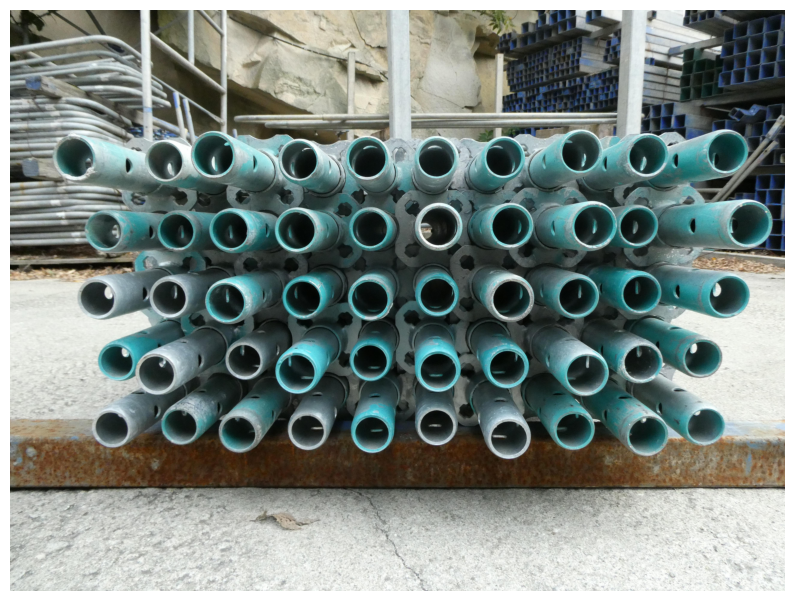

In [4]:
import cv2
# Tải mô hình đã huấn luyện
model = YOLO("./runs/detect/train33/weights/best.pt")  # Đảm bảo đường dẫn đúng và đuôi tệp là .pt

# Đọc ảnh
image_path = './datasets/train/images/P1070465_JPG.rf.e5881a1c81ab7a2201c01f6f2dba6ae6.jpg'  # Thay đổi đường dẫn tới ảnh của bạn
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Dự đoán
results_model = model(image_rgb)

# Hiển thị kết quả
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')

# Vẽ bounding boxes và đếm số lượng đối tượng
detected_boxes = results_model[0].boxes  # Lấy các bounding box từ kết quả

for box in detected_boxes:
    # Lấy thông tin từ box
    x1, y1, x2, y2 = box.xyxy[0].tolist()  # Tọa độ
    conf = box.conf[0].item()  # Độ tin cậy
    cls = int(box.cls[0].item())  # Lớp

    # Vẽ bounding box
    cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image_rgb, f'Class: {cls}, Conf: {conf:.2f}', 
                (int(x1), int(y1) - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Hiển thị ảnh với bounding boxes
print(f'Detected Objects: {len(detected_boxes)}')


# Lưu ảnh với bounding boxes
output_image_path = 'output.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
print(f"Saved output image to {output_image_path}")

# Training with yolo11l

In [3]:
model = YOLO("./runs/detect/train33/weights/best.pt")

In [4]:
results = model.train(
    data=data_config,        # Đường dẫn đến tập dữ liệu
    epochs=40,           # Số lượng epoch
    plots=True,              # Vẽ biểu đồ
    batch=3,                 # Kích thước batch (giảm xuống 3)
    workers=3,               # Số lượng worker (giảm xuống 3)
    amp=True                 # Kích hoạt Mixed Precision
)

New https://pypi.org/project/ultralytics/8.3.69 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
engine/trainer: task=detect, mode=train, model=./runs/detect/train33/weights/best.pt, data=./data.yaml, epochs=40, time=None, patience=100, batch=3, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=3, project=None, name=train35, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

train: Scanning /mnt/d/Tinhtoansongsong/datasets/train/labels.cache... 6968 images, 0 backgrounds, 1 corrupt: 100%|█████

train: WARNING ⚠️ /mnt/d/Tinhtoansongsong/datasets/train/images/P1060017_JPG.rf.b8ad88f3bca94ae8d54cfa5ced4a56f2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0026708]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12067, len(boxes) = 129674. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /mnt/d/Tinhtoansongsong/datasets/valid/labels.cache... 905 images, 0 backgrounds, 0 corrupt: 100%|████████

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1200, len(boxes) = 25441. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train35/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0004921875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 3 dataloader workers
Logging results to runs/detect/train35
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.94G       1.26     0.6907      1.206          1        640: 100%|██████████| 2323/2323 [35:31<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:2

                   all        905      25441      0.856      0.757      0.766      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.94G      1.296      0.736      1.228         23        640: 100%|██████████| 2323/2323 [34:54<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.768      0.768      0.742      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      3.17G      1.318     0.7521      1.239          5        640: 100%|██████████| 2323/2323 [34:58<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.825      0.761      0.743      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.85G      1.321      0.743       1.23         58        640: 100%|██████████| 2323/2323 [34:53<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.846      0.752      0.796      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40       2.8G      1.304     0.7386       1.23          1        640: 100%|██████████| 2323/2323 [34:58<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.776      0.786      0.766      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.92G      1.305     0.7407      1.233         33        640: 100%|██████████| 2323/2323 [35:09<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:2

                   all        905      25441      0.818      0.771      0.755      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.96G      1.299     0.7325      1.225          7        640: 100%|██████████| 2323/2323 [35:16<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.843      0.764      0.767       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.79G      1.303      0.726      1.232         69        640: 100%|██████████| 2323/2323 [35:25<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.774      0.745      0.706      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.79G      1.274     0.7108      1.226          1        640: 100%|██████████| 2323/2323 [35:21<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.801      0.756      0.734       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.82G      1.302     0.7129      1.223         51        640: 100%|██████████| 2323/2323 [35:26<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441       0.78      0.787      0.783      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.76G      1.295     0.7059      1.229         11        640: 100%|██████████| 2323/2323 [35:32<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.844      0.781       0.77      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.74G      1.281     0.6917      1.214         29        640: 100%|██████████| 2323/2323 [35:29<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.823      0.771       0.78      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.79G      1.283     0.6912      1.217          4        640: 100%|██████████| 2323/2323 [35:28<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:2

                   all        905      25441      0.864      0.761      0.787      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.71G      1.264     0.6815       1.21         55        640: 100%|██████████| 2323/2323 [35:08<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.808      0.784      0.786      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      2.97G      1.269     0.6861       1.21         28        640: 100%|██████████| 2323/2323 [35:20<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.761      0.812      0.781      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.67G      1.243     0.6773      1.197          2        640: 100%|██████████| 2323/2323 [34:50<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441        0.8      0.777      0.757      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.94G      1.256     0.6678      1.198         81        640: 100%|██████████| 2323/2323 [36:26<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.775      0.795      0.783      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.99G      1.246     0.6597        1.2          2        640: 100%|██████████| 2323/2323 [34:51<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.756      0.846      0.793      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      3.02G      1.231     0.6559      1.189          1        640: 100%|██████████| 2323/2323 [34:47<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.798      0.781      0.765      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.98G      1.238     0.6612      1.196          6        640: 100%|██████████| 2323/2323 [34:52<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.785      0.815       0.81      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.91G      1.232     0.6625      1.193         47        640: 100%|██████████| 2323/2323 [34:49<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.811      0.791      0.797      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.97G      1.226     0.6521      1.184         48        640: 100%|██████████| 2323/2323 [34:49<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.851      0.762      0.812      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.94G      1.218     0.6464      1.183         19        640: 100%|██████████| 2323/2323 [34:50<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  81%|████████  | 122/151 [00:5

WARNING ⚠️ NMS time limit 2.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.778      0.819      0.826      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      2.93G        1.2      0.647      1.179          2        640: 100%|██████████| 2323/2323 [34:43<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.821      0.773      0.798      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      2.77G      1.211     0.6498      1.179          2        640: 100%|██████████| 2323/2323 [34:46<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441       0.77       0.85      0.813      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      2.95G      1.205     0.6379      1.183         50        640: 100%|██████████| 2323/2323 [34:47<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:2

                   all        905      25441      0.845      0.766      0.795      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.75G      1.203      0.647      1.178          9        640: 100%|██████████| 2323/2323 [34:48<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   9%|▉         | 14/151 [00:05

WARNING ⚠️ NMS time limit 2.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.754        0.8      0.782      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.72G      1.194      0.639      1.177         46        640: 100%|██████████| 2323/2323 [35:05<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:3

                   all        905      25441      0.778      0.808      0.816      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.94G      1.184     0.6321       1.17          0        640: 100%|██████████| 2323/2323 [34:49<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  87%|████████▋ | 132/151 [01:0

WARNING ⚠️ NMS time limit 2.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.763      0.822      0.812      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.94G      1.179     0.6314      1.168         20        640: 100%|██████████| 2323/2323 [34:47<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.775       0.84      0.808      0.478


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.52G      1.055     0.5972      1.133          1        640: 100%|██████████| 2323/2323 [34:42<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441       0.77      0.826      0.816      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      2.53G       1.04     0.5879      1.123         51        640: 100%|██████████| 2323/2323 [34:43<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441       0.77      0.798      0.807      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.56G       1.03     0.5785      1.125          1        640: 100%|██████████| 2323/2323 [34:31<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441       0.78      0.795      0.803      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.68G       1.03     0.5678       1.12         49        640: 100%|██████████| 2323/2323 [35:03<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.757      0.818      0.818      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.67G      1.019     0.5705      1.114          1        640: 100%|██████████| 2323/2323 [38:16<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:3

                   all        905      25441      0.764      0.809      0.803      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.52G      1.022     0.5635      1.118         43        640: 100%|██████████| 2323/2323 [37:38<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:3

                   all        905      25441      0.754      0.819      0.806      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      2.62G      1.011     0.5573      1.109         31        640: 100%|██████████| 2323/2323 [34:57<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.754      0.816      0.812      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      2.48G      1.003     0.5549      1.104          1        640: 100%|██████████| 2323/2323 [34:30<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1

                   all        905      25441      0.762      0.805      0.808      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40       2.5G      1.009     0.5608      1.113          1        640: 100%|██████████| 2323/2323 [34:33<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:2

                   all        905      25441      0.775      0.794      0.806      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      2.52G      1.004     0.5541      1.103          1        640: 100%|██████████| 2323/2323 [34:35<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:2

                   all        905      25441      0.793      0.788      0.807      0.484



40 epochs completed in 24.340 hours.
Optimizer stripped from runs/detect/train35/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train35/weights/best.pt, 40.5MB

Validating runs/detect/train35/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
YOLO11m summary (fused): 303 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [01:1


                   all        905      25441      0.757      0.818      0.818      0.489
          TYPE 1 - P05         99       5202       0.97      0.982      0.985      0.705
      TYPE 2 - IQA1425         23        307       0.61      0.899      0.714      0.344
      TYPE 2 - IQA1900        231      10179      0.805      0.665      0.761      0.327
      TYPE 2 - IQA3800         50       1355      0.745      0.821      0.842      0.507
       TYPE 2 - IQA950        337       6408      0.798      0.995      0.976        0.7
           TYPE 7 - L1         10        193      0.683      0.548      0.765      0.497
        TYPE2-IQA2750A        155       1797      0.689      0.815      0.681      0.346
Speed: 0.5ms preprocess, 59.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train35


In [5]:
model.save('training_results_1m.pt') 

In [12]:
import cv2
# Tải mô hình đã huấn luyện
model = YOLO("./training_results_1m.pt")  # Đảm bảo đường dẫn đúng và đuôi tệp là .pt

# Đọc ảnh
image_path = './datasets/train/images/P1070412_JPG.rf.9d42dc907dd389f5899f41aa0db32cf0.jpg'  # Thay đổi đường dẫn tới ảnh của bạn
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Dự đoán
results_model = model(image_rgb)

# Hiển thị kết quả
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')

# Vẽ bounding boxes và đếm số lượng đối tượng
detected_boxes = results_model[0].boxes  # Lấy các bounding box từ kết quả

for box in detected_boxes:
    # Lấy thông tin từ box
    x1, y1, x2, y2 = box.xyxy[0].tolist()  # Tọa độ
    conf = box.conf[0].item()  # Độ tin cậy
    cls = int(box.cls[0].item())  # Lớp

    # Vẽ bounding box
    cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image_rgb, f'Class: {cls}, Conf: {conf:.2f}', 
                (int(x1), int(y1) - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Hiển thị ảnh với bounding boxes
print(f'Detected Objects: {len(detected_boxes)}')


# Lưu ảnh với bounding boxes
output_image_path = 'output.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
print(f"Saved output image to {output_image_path}")


0: 480x640 38 TYPE 2 - IQA950s, 4 TYPE2-IQA2750As, 43.5ms
Speed: 3.8ms preprocess, 43.5ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Detected Objects: 42
Saved output image to output.jpg


In [3]:
model = YOLO("./training_results_1m.pt")

In [4]:
results = model.train(
    data=data_config,        # Đường dẫn đến tập dữ liệu
    epochs=40,               # Số lượng epoch
    plots=True,              # Vẽ biểu đồ
    batch=4,                 # Kích thước batch (giảm xuống 4)
    workers=4,               # Số lượng worker (giảm xuống 4)
    amp=True                 # Kích hoạt Mixed Precision
)

New https://pypi.org/project/ultralytics/8.3.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
engine/trainer: task=detect, mode=train, model=./training_results_1m.pt, data=./data.yaml, epochs=40, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train39, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning /mnt/d/Tinhtoansongsong/datasets/train/labels.cache... 6968 images, 0 backgrounds, 1 corrupt: 100%|█████

train: WARNING ⚠️ /mnt/d/Tinhtoansongsong/datasets/train/images/P1060017_JPG.rf.b8ad88f3bca94ae8d54cfa5ced4a56f2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0026708]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12067, len(boxes) = 129674. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /mnt/d/Tinhtoansongsong/datasets/valid/labels.cache... 905 images, 0 backgrounds, 0 corrupt: 100%|████████

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1200, len(boxes) = 25441. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train39/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train39
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.39G      1.209     0.6335       1.17        117        640: 100%|██████████| 1742/1742 [33:02<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.769       0.81      0.814      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      3.63G      1.247     0.6479      1.188        100        640: 100%|██████████| 1742/1742 [32:53<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.841      0.775      0.827      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      3.57G      1.258     0.6678      1.194         85        640: 100%|██████████| 1742/1742 [33:06<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.794        0.8      0.803       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      3.78G      1.263     0.6736      1.197         85        640: 100%|██████████| 1742/1742 [33:33<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.797      0.764      0.769      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      3.55G      1.252     0.6681      1.194          4        640: 100%|██████████| 1742/1742 [33:34<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1


                   all        905      25441      0.761      0.796      0.781      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40       3.3G      1.246     0.6698      1.194         85        640: 100%|██████████| 1742/1742 [33:35<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441       0.77      0.789       0.79      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      3.41G      1.242     0.6668      1.194          5        640: 100%|██████████| 1742/1742 [33:43<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.733      0.849      0.814      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      3.57G      1.255      0.665      1.191        106        640: 100%|██████████| 1742/1742 [33:47<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.787      0.841      0.824      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      3.77G      1.243     0.6595       1.19        102        640: 100%|██████████| 1742/1742 [33:46<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.838      0.766      0.788       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      3.58G      1.244     0.6536      1.187        128        640: 100%|██████████| 1742/1742 [33:41<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.772      0.819      0.833      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      3.73G      1.249      0.657      1.186         32        640: 100%|██████████| 1742/1742 [33:27<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.793      0.834      0.818      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40       3.5G      1.234     0.6572      1.183        158        640: 100%|██████████| 1742/1742 [33:43<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.822      0.784      0.804      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      3.72G      1.235     0.6451      1.187         40        640: 100%|██████████| 1742/1742 [33:10<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2

                   all        905      25441      0.843       0.77      0.816      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      3.64G      1.242     0.6406      1.181          6        640: 100%|██████████| 1742/1742 [32:38<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  91%|█████████ | 104/114 [01:0

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.778      0.828      0.822       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      3.71G       1.22     0.6399      1.175        127        640: 100%|██████████| 1742/1742 [32:09<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2


                   all        905      25441      0.732      0.831      0.807      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      3.32G       1.21     0.6414      1.169        137        640: 100%|██████████| 1742/1742 [33:10<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.784      0.815      0.813      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      3.72G      1.226     0.6417      1.165         40        640: 100%|██████████| 1742/1742 [35:42<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.745      0.814      0.796      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      3.52G      1.204     0.6344      1.166        228        640: 100%|██████████| 1742/1742 [33:12<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2


                   all        905      25441      0.759      0.834      0.803      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      3.34G      1.205     0.6288      1.168        235        640: 100%|██████████| 1742/1742 [32:49<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2

                   all        905      25441      0.756       0.81       0.81      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      3.55G      1.218     0.6419      1.166         26        640: 100%|██████████| 1742/1742 [32:45<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2

                   all        905      25441      0.759      0.822      0.801      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      3.67G        1.2     0.6289      1.163         91        640: 100%|██████████| 1742/1742 [32:31<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:4

                   all        905      25441       0.79      0.783      0.807       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      3.91G      1.198     0.6344      1.159        183        640: 100%|██████████| 1742/1742 [34:00<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.758      0.814      0.822      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      3.83G      1.185     0.6316      1.157         65        640: 100%|██████████| 1742/1742 [33:02<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.776      0.819       0.83        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40       3.6G      1.195     0.6287      1.155         81        640: 100%|██████████| 1742/1742 [32:31<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:4

                   all        905      25441      0.755      0.852       0.82      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40       4.5G      1.199     0.6267       1.16         62        640: 100%|██████████| 1742/1742 [32:29<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:3

                   all        905      25441      0.763      0.839      0.826      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      3.49G      1.173     0.6157      1.149        125        640: 100%|██████████| 1742/1742 [32:25<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:3

                   all        905      25441      0.784      0.816      0.824      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      3.56G      1.197     0.6321      1.155         34        640: 100%|██████████| 1742/1742 [32:35<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:5

                   all        905      25441      0.801      0.831      0.844      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      3.84G      1.173     0.6203      1.153        166        640: 100%|██████████| 1742/1742 [32:26<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:5

                   all        905      25441      0.783       0.82      0.839      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      3.63G      1.177     0.6174       1.15          9        640: 100%|██████████| 1742/1742 [34:40<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:0

                   all        905      25441       0.78      0.849      0.845      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      3.58G      1.169     0.6133      1.139        201        640: 100%|██████████| 1742/1742 [32:21<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:2


                   all        905      25441       0.79      0.839      0.848      0.512
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      3.45G      1.074     0.5961      1.129         47        640: 100%|██████████| 1742/1742 [32:34<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:1

                   all        905      25441      0.766       0.83      0.839      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      3.34G      1.068     0.5843      1.131         43        640: 100%|██████████| 1742/1742 [33:20<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:4

                   all        905      25441      0.766       0.83      0.846      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      3.28G      1.056     0.5776      1.131        107        640: 100%|██████████| 1742/1742 [32:14<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:5

                   all        905      25441      0.772      0.827      0.829      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      3.33G      1.053     0.5672      1.122         51        640: 100%|██████████| 1742/1742 [32:19<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:4

                   all        905      25441      0.768      0.838      0.843      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40       3.3G       1.06     0.5722      1.123          3        640: 100%|██████████| 1742/1742 [32:24<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:1

                   all        905      25441      0.772      0.808      0.829      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      3.34G       1.06     0.5697      1.123         52        640: 100%|██████████| 1742/1742 [32:19<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:0

                   all        905      25441      0.753      0.827       0.83       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      3.27G      1.055     0.5693      1.122         40        640: 100%|██████████| 1742/1742 [32:29<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|▌         | 7/114 [00:03<

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:2

                   all        905      25441      0.765      0.821      0.841      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      3.23G      1.038     0.5659      1.108         65        640: 100%|██████████| 1742/1742 [32:20<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2

                   all        905      25441      0.762      0.821      0.831       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      3.42G      1.048      0.565      1.115         48        640: 100%|██████████| 1742/1742 [32:12<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.761      0.821      0.827      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      3.31G       1.05     0.5614      1.116         47        640: 100%|██████████| 1742/1742 [32:41<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.753      0.825      0.828       0.51



40 epochs completed in 23.212 hours.
Optimizer stripped from runs/detect/train39/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train39/weights/best.pt, 40.5MB

Validating runs/detect/train39/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
YOLO11m summary (fused): 303 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2


                   all        905      25441      0.766      0.821      0.841      0.515
          TYPE 1 - P05         99       5202      0.973      0.983      0.986      0.725
      TYPE 2 - IQA1425         23        307      0.602      0.886      0.805       0.39
      TYPE 2 - IQA1900        231      10179      0.836      0.657      0.767      0.333
      TYPE 2 - IQA3800         50       1355      0.776       0.82      0.864      0.535
       TYPE 2 - IQA950        337       6408      0.791      0.995      0.988      0.731
           TYPE 7 - L1         10        193      0.675      0.596       0.77      0.519
        TYPE2-IQA2750A        155       1797       0.71       0.81      0.709      0.371
Speed: 0.6ms preprocess, 60.8ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train39


In [5]:
model.save('training_results_2m.pt') 

In [9]:
import cv2

# Hàm cân bằng sáng tự động bằng CLAHE
def auto_brightness(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)  # Chuyển sang LAB
    l, a, b = cv2.split(lab)  # Tách kênh L (độ sáng), A, B

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Khởi tạo CLAHE
    l_eq = clahe.apply(l)  # Cân bằng sáng cho kênh L

    lab_eq = cv2.merge((l_eq, a, b))  # Gộp lại thành ảnh LAB
    bright_image = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2RGB)  # Chuyển về RGB
    return bright_image

# Tải mô hình đã huấn luyện
model = YOLO("./runs/detect/train41/weights/best.pt")  # Đảm bảo đường dẫn đúng

# Đọc ảnh
image_path = './datasets/train/images/P1610469_JPG.rf.a6350f51c5552699c31145aae9276fed.jpg'  # Đường dẫn ảnh
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Cân bằng sáng trước khi đưa vào mô hình
bright_image = auto_brightness(image_rgb)

# Dự đoán
results_model = model(bright_image)

# Hiển thị kết quả
plt.figure(figsize=(10, 10))
plt.imshow(bright_image)
plt.axis('off')

# Vẽ bounding boxes và đếm số lượng đối tượng
detected_boxes = results_model[0].boxes  # Lấy các bounding box từ kết quả

for box in detected_boxes:
    # Lấy thông tin từ box
    x1, y1, x2, y2 = box.xyxy[0].tolist()  # Tọa độ
    conf = box.conf[0].item()  # Độ tin cậy
    cls = int(box.cls[0].item())  # Lớp

    # Vẽ bounding box
    cv2.rectangle(bright_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(bright_image, f'Class: {cls}, Conf: {conf:.2f}', 
                (int(x1), int(y1) - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Hiển thị ảnh với bounding boxes
print(f'Detected Objects: {len(detected_boxes)}')

# Lưu ảnh với bounding boxes
output_image_path = 'output.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(bright_image, cv2.COLOR_RGB2BGR))
print(f"Saved output image to {output_image_path}")



0: 480x640 10 TYPE 7 - L1s, 43.4ms
Speed: 2.9ms preprocess, 43.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)
Detected Objects: 10
Saved output image to output.jpg


In [8]:
model = YOLO("./training_results_3m.pt")

FileNotFoundError: [Errno 2] No such file or directory: 'training_results_3m.pt'

In [5]:
results = model.train(
    data=data_config,        # Đường dẫn đến tập dữ liệu
    epochs=40,               # Số lượng epoch
    plots=True,              # Vẽ biểu đồ
    batch=5,                 # Kích thước batch (giảm xuống 5)
    workers=4,               # Số lượng worker (giảm xuống 4)
    amp=True                 # Kích hoạt Mixed Precision
)

New https://pypi.org/project/ultralytics/8.3.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
engine/trainer: task=detect, mode=train, model=./training_results_2m.pt, data=./data.yaml, epochs=40, time=None, patience=100, batch=5, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=5, project=None, name=train41, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning /mnt/d/Tinhtoansongsong/datasets/train/labels.cache... 6968 images, 0 backgrounds, 1 corrupt: 100%|█████

train: WARNING ⚠️ /mnt/d/Tinhtoansongsong/datasets/train/images/P1060017_JPG.rf.b8ad88f3bca94ae8d54cfa5ced4a56f2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0026708]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12067, len(boxes) = 129674. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /mnt/d/Tinhtoansongsong/datasets/valid/labels.cache... 905 images, 0 backgrounds, 0 corrupt: 100%|████████

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1200, len(boxes) = 25441. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train41/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005078125), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 5 dataloader workers
Logging results to runs/detect/train41
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      4.84G      1.175     0.6164      1.145         85        640: 100%|██████████| 1394/1394 [31:59<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [02:07<


                   all        905      25441      0.767      0.838      0.856      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40       4.7G      1.207     0.6322       1.15         68        640: 100%|██████████| 1394/1394 [1:04:57<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:57<

                   all        905      25441      0.819      0.781       0.83      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      4.93G      1.217     0.6405      1.162         10        640: 100%|██████████| 1394/1394 [54:06<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [02:14<

                   all        905      25441      0.821      0.776      0.803       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      4.48G      1.234     0.6434      1.168        104        640: 100%|██████████| 1394/1394 [41:54<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [02:00<

                   all        905      25441      0.772       0.81      0.821      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      3.95G      1.225     0.6483      1.156         82        640: 100%|██████████| 1394/1394 [31:57<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:30<

                   all        905      25441      0.757      0.816      0.801      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      5.11G      1.217     0.6377      1.163         48        640: 100%|██████████| 1394/1394 [45:17<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [02:24<

                   all        905      25441      0.787      0.814      0.835      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40       4.6G      1.215     0.6391      1.157         53        640: 100%|██████████| 1394/1394 [38:24<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:38<

                   all        905      25441       0.76      0.835      0.814      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      4.17G      1.228     0.6378      1.164        105        640: 100%|██████████| 1394/1394 [51:38<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:26<

                   all        905      25441      0.788      0.826      0.814      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      4.47G      1.209     0.6423       1.16         13        640: 100%|██████████| 1394/1394 [31:04<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:36<

                   all        905      25441      0.848      0.766      0.814      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      4.02G      1.208     0.6265       1.15        126        640: 100%|██████████| 1394/1394 [34:03<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:29<

                   all        905      25441      0.795      0.796      0.815      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      4.74G      1.195      0.626      1.151         54        640: 100%|██████████| 1394/1394 [40:03<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:27<

                   all        905      25441      0.796      0.801      0.814      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      4.42G      1.205     0.6301      1.146         43        640: 100%|██████████| 1394/1394 [44:16<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:42<

                   all        905      25441      0.815      0.795      0.831        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      4.52G      1.201     0.6319      1.149          6        640: 100%|██████████| 1394/1394 [57:20<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:46<

                   all        905      25441      0.782      0.848      0.868      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      4.31G      1.195      0.619      1.142         97        640: 100%|██████████| 1394/1394 [53:26<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:26<

                   all        905      25441      0.782      0.848      0.843      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      4.16G      1.195     0.6219       1.15         56        640: 100%|██████████| 1394/1394 [31:17<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:07<

                   all        905      25441      0.768      0.844       0.85      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40       4.3G      1.183     0.6133      1.142         76        640: 100%|██████████| 1394/1394 [47:36<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:23<

                   all        905      25441      0.772      0.789      0.809      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      4.19G      1.196     0.6218      1.148          7        640: 100%|██████████| 1394/1394 [34:47<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:09<

                   all        905      25441      0.783      0.824      0.831      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      4.54G      1.168     0.6132      1.136          2        640: 100%|██████████| 1394/1394 [32:31<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:17<

                   all        905      25441       0.77      0.816      0.804      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40       5.1G      1.176     0.6135      1.135         48        640: 100%|██████████| 1394/1394 [36:15<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:54<

                   all        905      25441      0.775       0.84       0.85      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      4.94G       1.19     0.6175      1.148         56        640: 100%|██████████| 1394/1394 [1:50:06<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [02:24<

                   all        905      25441      0.779      0.809      0.848      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40       4.3G      1.179     0.6172      1.134         46        640: 100%|██████████| 1394/1394 [57:58<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [04:21<

                   all        905      25441       0.78      0.825      0.839      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      4.53G      1.157     0.6117       1.13         17        640: 100%|██████████| 1394/1394 [31:15<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:20<

                   all        905      25441      0.791      0.829      0.845      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      4.13G      1.178     0.6088      1.137         19        640: 100%|██████████| 1394/1394 [46:39<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:26<

                   all        905      25441      0.766      0.816      0.847      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      4.02G      1.169     0.6057      1.133         47        640: 100%|██████████| 1394/1394 [39:08<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:32<

                   all        905      25441      0.766      0.832      0.845      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      4.16G      1.152     0.6018      1.131         43        640: 100%|██████████| 1394/1394 [46:09<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:32<

                   all        905      25441      0.792      0.815      0.832      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      4.16G      1.161     0.6052       1.13        106        640: 100%|██████████| 1394/1394 [31:27<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [02:06<

                   all        905      25441      0.782      0.823      0.845      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      4.39G      1.154     0.6109      1.126          4        640: 100%|██████████| 1394/1394 [1:24:18<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [02:13<

                   all        905      25441      0.798      0.829      0.865      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40       4.2G      1.157      0.595      1.128          3        640: 100%|██████████| 1394/1394 [39:10<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:28<

                   all        905      25441      0.779      0.818      0.854      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      4.25G      1.145     0.5954      1.121         52        640: 100%|██████████| 1394/1394 [45:08<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:23<

                   all        905      25441      0.788      0.833      0.859      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      4.23G      1.143     0.5892      1.124         49        640: 100%|██████████| 1394/1394 [32:22<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:47<

                   all        905      25441      0.805       0.84       0.86      0.531


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      4.16G      1.088     0.5832      1.127         50        640: 100%|██████████| 1394/1394 [34:40<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:42<

                   all        905      25441      0.802      0.811      0.857      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      3.84G      1.087     0.5796      1.131         55        640: 100%|██████████| 1394/1394 [31:20<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:46<

                   all        905      25441      0.785      0.831      0.863      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      3.85G      1.067     0.5672      1.122         51        640: 100%|██████████| 1394/1394 [32:02<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:49<

                   all        905      25441      0.784      0.822      0.852      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      4.22G      1.071     0.5601      1.126         51        640: 100%|██████████| 1394/1394 [52:16<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  34%|███▍      | 31/91 [00:27<

WARNING ⚠️ NMS time limit 2.500s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [01:59<

                   all        905      25441      0.789      0.822      0.854      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      4.38G      1.067     0.5632      1.126          2        640: 100%|██████████| 1394/1394 [56:00<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [02:31<

                   all        905      25441      0.782      0.829      0.851      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      3.94G      1.091     0.5882      1.134        125        640:  25%|██▌       | 349/1394 [08:16<24:45,  


KeyboardInterrupt: 

In [3]:
model = YOLO("./runs/detect/train41/weights/best.pt")

In [4]:
results = model.train(
    data=data_config,        # Đường dẫn đến tập dữ liệu
    epochs=40,               # Số lượng epoch
    plots=True,              # Vẽ biểu đồ
    batch=4,                 # Kích thước batch (giảm xuống 4)
    workers=4,               # Số lượng worker (giảm xuống 4)
    amp=True                 # Kích hoạt Mixed Precision
)

New https://pypi.org/project/ultralytics/8.3.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
engine/trainer: task=detect, mode=train, model=./runs/detect/train41/weights/best.pt, data=./data.yaml, epochs=40, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train43, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

train: Scanning /mnt/d/Tinhtoansongsong/datasets/train/labels.cache... 6968 images, 0 backgrounds, 1 corrupt: 100%|█████

train: WARNING ⚠️ /mnt/d/Tinhtoansongsong/datasets/train/images/P1060017_JPG.rf.b8ad88f3bca94ae8d54cfa5ced4a56f2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0026708]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12067, len(boxes) = 129674. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /mnt/d/Tinhtoansongsong/datasets/valid/labels.cache... 905 images, 0 backgrounds, 0 corrupt: 100%|████████

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1200, len(boxes) = 25441. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train43/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train43
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.39G      1.129      0.601      1.121        117        640: 100%|██████████| 1742/1742 [34:22<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1


                   all        905      25441      0.787      0.858      0.864      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      3.63G      1.166     0.6116      1.137        100        640: 100%|██████████| 1742/1742 [33:27<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.775      0.852      0.858      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      3.57G      1.176     0.6267      1.141         85        640: 100%|██████████| 1742/1742 [33:14<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.806      0.819       0.82      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      3.79G      1.182     0.6297      1.145         85        640: 100%|██████████| 1742/1742 [33:06<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.774      0.804      0.832      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      3.61G      1.175     0.6267      1.146          4        640: 100%|██████████| 1742/1742 [33:05<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.769      0.815      0.825      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40       3.3G      1.167     0.6318      1.144         85        640: 100%|██████████| 1742/1742 [33:13<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.799      0.835      0.851      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      3.41G      1.168     0.6287      1.142          5        640: 100%|██████████| 1742/1742 [33:46<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.782      0.841      0.834      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      3.57G      1.181     0.6294      1.142        106        640: 100%|██████████| 1742/1742 [33:44<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▍        | 17/114 [00:08

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.806      0.836      0.848      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      3.77G      1.169     0.6259      1.142        102        640: 100%|██████████| 1742/1742 [33:43<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441       0.76      0.815      0.827      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      3.58G      1.169     0.6217      1.139        128        640: 100%|██████████| 1742/1742 [33:54<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2

                   all        905      25441      0.801      0.831      0.856       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      3.58G      1.174     0.6244       1.14         32        640: 100%|██████████| 1742/1742 [33:44<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.797      0.846      0.838      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40       3.5G      1.162     0.6242      1.137        158        640: 100%|██████████| 1742/1742 [33:20<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2

                   all        905      25441      0.821      0.827      0.858      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      3.72G      1.163      0.614       1.14         40        640: 100%|██████████| 1742/1742 [34:10<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:5

                   all        905      25441      0.791      0.859      0.872      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      3.64G      1.172     0.6122      1.135          6        640: 100%|██████████| 1742/1742 [32:39<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:5


                   all        905      25441      0.819      0.809      0.849      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      3.71G       1.15     0.6072       1.13        127        640: 100%|██████████| 1742/1742 [33:14<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:2

                   all        905      25441      0.799      0.821      0.868      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      3.43G      1.142     0.6064      1.127        137        640: 100%|██████████| 1742/1742 [32:42<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:2


                   all        905      25441      0.792      0.826      0.851      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      3.62G      1.161      0.609      1.126         40        640: 100%|██████████| 1742/1742 [32:51<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:5

                   all        905      25441      0.805      0.837       0.84      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      3.42G      1.134     0.5984      1.125        228        640: 100%|██████████| 1742/1742 [33:15<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:3

                   all        905      25441      0.789      0.836       0.85      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      3.39G      1.138     0.5973      1.128        235        640: 100%|██████████| 1742/1742 [32:48<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:3

                   all        905      25441      0.787      0.843       0.85       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      3.55G       1.15      0.612      1.127         26        640: 100%|██████████| 1742/1742 [33:21<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:2


                   all        905      25441      0.785      0.823      0.841      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      3.67G      1.138     0.5983      1.125         91        640: 100%|██████████| 1742/1742 [33:18<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:5

                   all        905      25441      0.778      0.842      0.867      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      3.91G      1.134      0.601      1.121        183        640: 100%|██████████| 1742/1742 [32:47<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:4

                   all        905      25441      0.782      0.849      0.859      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      3.77G      1.122     0.6035      1.122         65        640: 100%|██████████| 1742/1742 [33:58<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:1

                   all        905      25441      0.779      0.841       0.85      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40       3.6G      1.134     0.5989      1.119         81        640: 100%|██████████| 1742/1742 [33:06<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:4

                   all        905      25441      0.771      0.839       0.85      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      4.49G      1.137     0.5952      1.124         62        640: 100%|██████████| 1742/1742 [33:11<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:0

                   all        905      25441      0.797      0.833      0.867      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      3.56G      1.111     0.5864      1.115        125        640: 100%|██████████| 1742/1742 [33:04<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:1

                   all        905      25441      0.793      0.829      0.851      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40       3.7G      1.136     0.6026      1.121         34        640: 100%|██████████| 1742/1742 [32:46<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:3

                   all        905      25441      0.811       0.83      0.867      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      3.89G      1.115     0.5906       1.12        166        640: 100%|██████████| 1742/1742 [33:06<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:4

                   all        905      25441      0.785      0.835      0.871      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      3.57G      1.117     0.5877      1.115          9        640: 100%|██████████| 1742/1742 [33:46<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:0


                   all        905      25441      0.805      0.853      0.869      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      3.58G       1.11     0.5856      1.106        201        640: 100%|██████████| 1742/1742 [34:08<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:5

                   all        905      25441      0.797      0.845      0.865      0.534


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      3.28G      1.021     0.5671      1.099         47        640: 100%|██████████| 1742/1742 [32:45<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441        0.8      0.839      0.865      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      3.45G      1.015     0.5591      1.101         43        640: 100%|██████████| 1742/1742 [32:30<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.796      0.841      0.873      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      3.21G      1.003      0.554        1.1        107        640: 100%|██████████| 1742/1742 [32:31<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3


                   all        905      25441       0.81      0.832      0.858      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      3.33G      1.003     0.5433      1.094         51        640: 100%|██████████| 1742/1742 [33:17<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.802       0.83      0.865      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      3.45G      1.012     0.5483      1.096          3        640: 100%|██████████| 1742/1742 [32:35<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.786      0.841      0.864      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      3.34G       1.01     0.5457      1.095         52        640: 100%|██████████| 1742/1742 [32:35<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2

                   all        905      25441      0.782      0.843      0.864      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      3.27G      1.008     0.5472      1.095         40        640: 100%|██████████| 1742/1742 [32:56<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2


                   all        905      25441      0.803      0.832      0.865      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      3.23G     0.9922     0.5438      1.083         65        640: 100%|██████████| 1742/1742 [34:33<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.795      0.838      0.857      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      3.43G      1.003     0.5425       1.09         48        640: 100%|██████████| 1742/1742 [33:51<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.798      0.834       0.86      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      3.45G      1.009     0.5402      1.092         47        640: 100%|██████████| 1742/1742 [33:46<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.791      0.837      0.861      0.535



40 epochs completed in 23.498 hours.
Optimizer stripped from runs/detect/train43/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train43/weights/best.pt, 40.5MB

Validating runs/detect/train43/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
YOLO11m summary (fused): 303 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1


                   all        905      25441      0.786      0.837       0.87      0.538
          TYPE 1 - P05         99       5202      0.978      0.983      0.986      0.744
      TYPE 2 - IQA1425         23        307      0.628      0.873      0.842      0.428
      TYPE 2 - IQA1900        231      10179      0.828      0.641      0.762      0.346
      TYPE 2 - IQA3800         50       1355      0.786      0.811      0.871      0.529
       TYPE 2 - IQA950        337       6408      0.803      0.992      0.987      0.739
           TYPE 7 - L1         10        193      0.751      0.734      0.831      0.562
        TYPE2-IQA2750A        155       1797      0.725      0.822      0.813       0.42
Speed: 0.6ms preprocess, 58.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train43


In [5]:
model.save('training_results_3m.pt') 


0: 480x640 57 TYPE 2 - IQA3800s, 47.7ms
Speed: 3.0ms preprocess, 47.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Detected Objects: 57


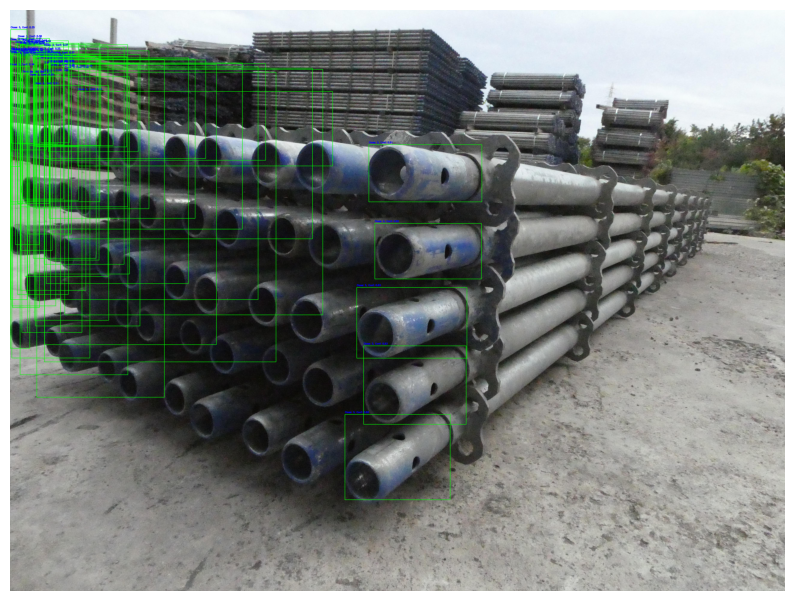

Saved output image to output.jpg


In [20]:
import cv2

# Tải mô hình đã huấn luyện
model = YOLO("./training_results_3m.pt")  # Đảm bảo đường dẫn đúng

# Đọc ảnh
image_path = './datasets/train/images/P1100791_JPG.rf.3301047ba29e26bd46d04bf2987d8288.jpg'  # Đường dẫn ảnh
image = cv2.imread(image_path)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Dự đoán
results_model = model(image)

# # Hiển thị kết quả
# plt.figure(figsize=(10, 10))
# plt.axis('off')

# Vẽ bounding boxes và đếm số lượng đối tượng
detected_boxes = results_model[0].boxes  # Lấy các bounding box từ kết quả

for box in detected_boxes:
    # Lấy thông tin từ box
    x1, y1, x2, y2 = box.xyxy[0].tolist()  # Tọa độ
    conf = box.conf[0].item()  # Độ tin cậy
    cls = int(box.cls[0].item())  # Lớp

    # Vẽ bounding box
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, f'Class: {cls}, Conf: {conf:.2f}', 
                (int(x1), int(y1) - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Hiển thị ảnh với bounding boxes
print(f'Detected Objects: {len(detected_boxes)}')

# Chuyển ảnh sang RGB để hiển thị
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Lưu ảnh với bounding boxes
output_image_path = 'output.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
print(f"Saved output image to {output_image_path}")


In [3]:
model = YOLO("./training_results_3m.pt")

In [4]:
results = model.train(
    data=data_config,        # Đường dẫn đến tập dữ liệu
    epochs=40,               # Số lượng epoch
    plots=True,              # Vẽ biểu đồ
    batch=4,                 # Kích thước batch (giảm xuống 4)
    workers=4,               # Số lượng worker (giảm xuống 4)
    amp=True                 # Kích hoạt Mixed Precision
)

New https://pypi.org/project/ultralytics/8.3.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
engine/trainer: task=detect, mode=train, model=./training_results_3m.pt, data=./data.yaml, epochs=40, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train44, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning /mnt/d/Tinhtoansongsong/datasets/train/labels.cache... 6968 images, 0 backgrounds, 1 corrupt: 100%|█████

train: WARNING ⚠️ /mnt/d/Tinhtoansongsong/datasets/train/images/P1060017_JPG.rf.b8ad88f3bca94ae8d54cfa5ced4a56f2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0026708]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12067, len(boxes) = 129674. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /mnt/d/Tinhtoansongsong/datasets/valid/labels.cache... 905 images, 0 backgrounds, 0 corrupt: 100%|████████

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1200, len(boxes) = 25441. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train44/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train44
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.39G      1.106     0.5919      1.109        117        640: 100%|██████████| 1742/1742 [34:27<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3


                   all        905      25441      0.802      0.839      0.863      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      3.62G      1.134     0.5938      1.121        100        640: 100%|██████████| 1742/1742 [33:46<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2

                   all        905      25441       0.81      0.834      0.875       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      3.57G      1.144       0.61      1.126         85        640: 100%|██████████| 1742/1742 [33:37<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2


                   all        905      25441      0.827      0.807      0.839      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      3.79G      1.149     0.6109       1.13         85        640: 100%|██████████| 1742/1742 [33:36<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.799      0.815      0.841      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      3.61G      1.141     0.6072      1.128          4        640: 100%|██████████| 1742/1742 [33:31<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2


                   all        905      25441      0.817      0.778      0.819      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40       3.3G      1.137     0.6139      1.127         85        640: 100%|██████████| 1742/1742 [33:36<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.811      0.831       0.86      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      3.41G      1.138     0.6058      1.129          5        640: 100%|██████████| 1742/1742 [33:31<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.792       0.83      0.839      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      3.57G      1.151     0.6126      1.127        106        640: 100%|██████████| 1742/1742 [33:42<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.809      0.843      0.865      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      3.77G      1.141     0.6102      1.127        102        640: 100%|██████████| 1742/1742 [33:41<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.782      0.814      0.851      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      3.58G      1.138     0.6071      1.122        128        640: 100%|██████████| 1742/1742 [33:42<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3


                   all        905      25441        0.8      0.844       0.87      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      3.73G      1.144     0.6088      1.124         32        640: 100%|██████████| 1742/1742 [33:59<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:4

                   all        905      25441      0.802      0.843      0.844      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      3.66G      1.131     0.6066      1.121        158        640: 100%|██████████| 1742/1742 [33:52<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:4

                   all        905      25441      0.808      0.826      0.852       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      3.72G      1.137     0.5993      1.128         40        640: 100%|██████████| 1742/1742 [34:16<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:0


                   all        905      25441      0.779      0.851      0.857      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      3.64G      1.144     0.5962      1.123          6        640: 100%|██████████| 1742/1742 [33:46<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:2

                   all        905      25441      0.814      0.823      0.851       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      3.56G      1.122     0.5922      1.119        127        640: 100%|██████████| 1742/1742 [34:10<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:3

                   all        905      25441      0.804      0.826      0.858      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      3.42G      1.117     0.5879      1.115        137        640: 100%|██████████| 1742/1742 [33:54<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:5

                   all        905      25441      0.812      0.833      0.864      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      3.72G      1.133     0.5927      1.113         40        640: 100%|██████████| 1742/1742 [34:37<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:5


                   all        905      25441      0.816      0.833      0.855      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      3.42G      1.107     0.5837      1.111        228        640: 100%|██████████| 1742/1742 [35:51<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:4

                   all        905      25441      0.794      0.829      0.839      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      3.34G      1.112     0.5829      1.115        235        640: 100%|██████████| 1742/1742 [34:38<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:2


                   all        905      25441      0.803      0.825      0.849      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      3.55G      1.127     0.5988      1.114         26        640: 100%|██████████| 1742/1742 [35:53<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:2

                   all        905      25441      0.788      0.826      0.843       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      3.67G      1.114     0.5846      1.114         91        640: 100%|██████████| 1742/1742 [34:47<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:1

                   all        905      25441      0.796      0.844      0.874      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      3.91G      1.108     0.5874       1.11        183        640: 100%|██████████| 1742/1742 [34:15<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:1

                   all        905      25441      0.791      0.854      0.876      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      3.83G      1.099     0.5869      1.109         65        640: 100%|██████████| 1742/1742 [34:01<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:4

                   all        905      25441      0.813      0.837      0.864      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      3.59G      1.109      0.584      1.108         81        640: 100%|██████████| 1742/1742 [33:55<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:5

                   all        905      25441      0.785      0.846      0.854      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40       4.5G      1.113     0.5822      1.112         62        640: 100%|██████████| 1742/1742 [35:52<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [02:1

                   all        905      25441      0.816      0.828      0.868      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      3.56G      1.089     0.5736      1.105        125        640: 100%|██████████| 1742/1742 [34:05<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:4

                   all        905      25441      0.819      0.825      0.861      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      3.57G      1.114     0.5884      1.113         34        640: 100%|██████████| 1742/1742 [34:41<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441       0.83      0.831      0.874      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      3.89G      1.094     0.5802      1.109        166        640: 100%|██████████| 1742/1742 [33:48<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3


                   all        905      25441      0.834      0.826      0.878      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      3.58G      1.103       0.58      1.108          9        640: 100%|██████████| 1742/1742 [33:34<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.805       0.85       0.87      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      3.58G      1.097     0.5795      1.101        201        640: 100%|██████████| 1742/1742 [33:42<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:5


                   all        905      25441      0.807      0.835      0.871      0.541
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      3.45G       1.01     0.5606      1.093         47        640: 100%|██████████| 1742/1742 [33:37<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:4

                   all        905      25441      0.821      0.837       0.87      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      3.45G      1.005     0.5524      1.093         43        640: 100%|██████████| 1742/1742 [33:21<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.825      0.838      0.879      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      3.21G     0.9926     0.5481      1.095        107        640: 100%|██████████| 1742/1742 [33:28<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.828      0.832       0.86      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      3.46G     0.9912      0.538      1.086         51        640: 100%|██████████| 1742/1742 [33:37<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.836      0.824      0.873      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40       3.3G          1      0.543       1.09          3        640: 100%|██████████| 1742/1742 [33:18<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2

                   all        905      25441      0.816      0.839      0.875      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      3.45G      0.998     0.5402      1.089         52        640: 100%|██████████| 1742/1742 [33:20<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.815      0.837      0.874      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40       3.2G     0.9968      0.542       1.09         40        640: 100%|██████████| 1742/1742 [33:03<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1

                   all        905      25441      0.834      0.826      0.877      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      3.12G     0.9821     0.5384      1.078         65        640: 100%|██████████| 1742/1742 [33:03<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2

                   all        905      25441       0.82      0.832      0.869      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      3.26G     0.9914     0.5386      1.084         48        640: 100%|██████████| 1742/1742 [39:41<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:2

                   all        905      25441      0.827      0.835      0.873      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      3.45G     0.9982     0.5348      1.086         47        640: 100%|██████████| 1742/1742 [32:34<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:3

                   all        905      25441      0.815      0.837       0.87      0.544



40 epochs completed in 24.028 hours.
Optimizer stripped from runs/detect/train44/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train44/weights/best.pt, 40.5MB

Validating runs/detect/train44/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
YOLO11m summary (fused): 303 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [01:1


                   all        905      25441      0.834      0.828      0.877      0.546
          TYPE 1 - P05         99       5202       0.98      0.982      0.987      0.757
      TYPE 2 - IQA1425         23        307      0.651      0.892      0.846      0.421
      TYPE 2 - IQA1900        231      10179       0.87      0.603      0.766      0.346
      TYPE 2 - IQA3800         50       1355      0.854      0.798      0.859      0.538
       TYPE 2 - IQA950        337       6408      0.839      0.988      0.988      0.752
           TYPE 7 - L1         10        193       0.85      0.735      0.888      0.584
        TYPE2-IQA2750A        155       1797      0.791        0.8      0.804      0.425
Speed: 0.6ms preprocess, 58.0ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train44


In [5]:
model.save('training_results_4m.pt') 


0: 480x640 27 TYPE 2 - IQA3800s, 47.2ms
Speed: 3.2ms preprocess, 47.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)
Detected Objects: 27


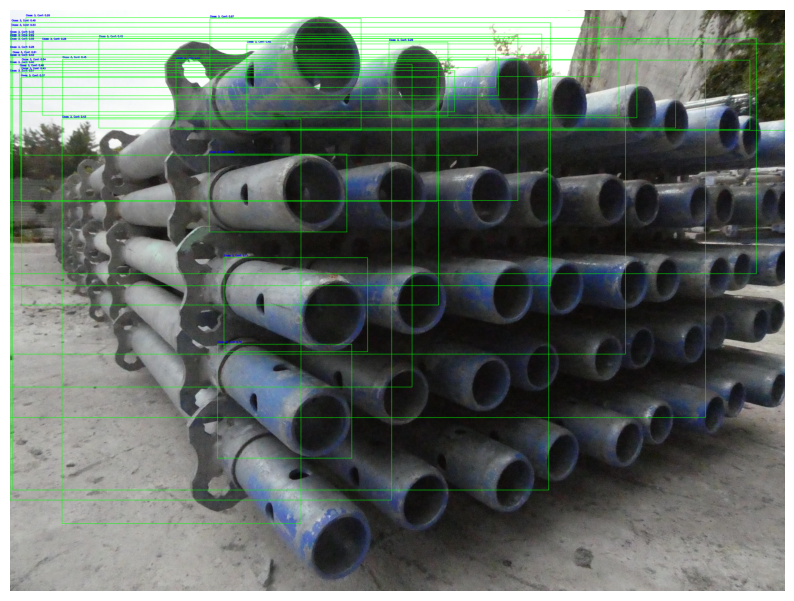

Saved output image to output.jpg


In [5]:
import cv2

# Tải mô hình đã huấn luyện
model = YOLO("./training_results_4m.pt")  # Đảm bảo đường dẫn đúng

# Đọc ảnh
image_path = './datasets/train/images/P1100989_JPG.rf.fbaae5176de4f1a0e0d94cc9b5de5d3b.jpg'  # Đường dẫn ảnh
image = cv2.imread(image_path)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Dự đoán
results_model = model(image)

# # Hiển thị kết quả
# plt.figure(figsize=(10, 10))
# plt.axis('off')

# Vẽ bounding boxes và đếm số lượng đối tượng
detected_boxes = results_model[0].boxes  # Lấy các bounding box từ kết quả

for box in detected_boxes:
    # Lấy thông tin từ box
    x1, y1, x2, y2 = box.xyxy[0].tolist()  # Tọa độ
    conf = box.conf[0].item()  # Độ tin cậy
    cls = int(box.cls[0].item())  # Lớp

    # Vẽ bounding box
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, f'Class: {cls}, Conf: {conf:.2f}', 
                (int(x1), int(y1) - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Hiển thị ảnh với bounding boxes
print(f'Detected Objects: {len(detected_boxes)}')

# Chuyển ảnh sang RGB để hiển thị
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Lưu ảnh với bounding boxes
output_image_path = 'output.jpg'
cv2.imwrite(output_image_path, image)
print(f"Saved output image to {output_image_path}")


In [3]:
model = YOLO("./model/yolo11m.pt")

In [4]:
results = model.train(
    data="./data.yaml",        # Đường dẫn đến tập dữ liệu
    epochs=40,               # Số lượng epoch
    plots=True,              # Vẽ biểu đồ
    batch=4,                 # Kích thước batch (giảm xuống 4)
    workers=4,               # Số lượng worker (giảm xuống 4)
    amp=True                 # Kích hoạt Mixed Precision
)

New https://pypi.org/project/ultralytics/8.3.72 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
engine/trainer: task=detect, mode=train, model=./model/yolo11m.pt, data=./data.yaml, epochs=40, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train59, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

train: Scanning /mnt/d/Tinhtoansongsong/datasets/train/labels.cache... 6968 images, 0 backgrounds, 1 corrupt: 100%|█████

train: WARNING ⚠️ /mnt/d/Tinhtoansongsong/datasets/train/images/P1060017_JPG.rf.b8ad88f3bca94ae8d54cfa5ced4a56f2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0026708]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12067, len(boxes) = 129674. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /mnt/d/Tinhtoansongsong/datasets/valid/labels.cache... 905 images, 0 backgrounds, 0 corrupt: 100%|████████

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1200, len(boxes) = 25441. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train59/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train59
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.39G      1.582      1.725      1.297        117        640: 100%|██████████| 1742/1742 [47:46<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:4


                   all        905      25441      0.451      0.457      0.311      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      3.63G      1.605      1.478      1.339        100        640: 100%|██████████| 1742/1742 [51:18<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:5


                   all        905      25441      0.434      0.554      0.424      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      3.58G      1.568      1.369      1.326         85        640: 100%|██████████| 1742/1742 [47:04<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:5


                   all        905      25441      0.532      0.505      0.457      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      3.79G      1.541      1.294       1.32         85        640: 100%|██████████| 1742/1742 [50:40<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:0


                   all        905      25441       0.59      0.582       0.54      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      3.61G      1.504      1.176      1.302          4        640: 100%|██████████| 1742/1742 [48:06<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:4


                   all        905      25441      0.723      0.577      0.613      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      3.31G      1.481      1.088      1.294         85        640: 100%|██████████| 1742/1742 [47:09<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:5

                   all        905      25441      0.551      0.638      0.563      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      3.42G      1.468      1.049      1.285          5        640: 100%|██████████| 1742/1742 [49:46<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:1


                   all        905      25441       0.73      0.641      0.656       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      3.58G       1.46      1.003      1.278        106        640: 100%|██████████| 1742/1742 [49:01<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:0

                   all        905      25441      0.826      0.693       0.72      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      3.77G       1.44     0.9527      1.268        102        640: 100%|██████████| 1742/1742 [45:57<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:0


                   all        905      25441      0.764        0.7      0.682      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      3.54G      1.433     0.9384      1.264        128        640: 100%|██████████| 1742/1742 [52:13<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:0

                   all        905      25441      0.733      0.636      0.627       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      3.74G      1.421     0.9102      1.255         32        640: 100%|██████████| 1742/1742 [49:22<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:0

                   all        905      25441      0.698      0.699      0.677       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40       3.5G       1.41     0.9101      1.254        158        640: 100%|██████████| 1742/1742 [50:57<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:1


                   all        905      25441      0.804      0.724      0.732      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      3.72G      1.401     0.8599      1.252         40        640: 100%|██████████| 1742/1742 [53:22<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:0

                   all        905      25441      0.746      0.683       0.68      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      3.65G      1.403     0.8308      1.243          6        640: 100%|██████████| 1742/1742 [48:52<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:5


                   all        905      25441      0.756      0.708      0.691       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      3.57G      1.374     0.8288      1.234        127        640: 100%|██████████| 1742/1742 [47:00<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:5


                   all        905      25441      0.733      0.709      0.698      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      3.33G      1.359     0.8199      1.227        137        640: 100%|██████████| 1742/1742 [45:35<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:4

                   all        905      25441      0.795      0.725      0.751      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      3.73G      1.372     0.8001      1.221         40        640: 100%|██████████| 1742/1742 [42:49<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:5


                   all        905      25441      0.804       0.75      0.744      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      3.43G      1.346     0.7822      1.222        228        640: 100%|██████████| 1742/1742 [46:21<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:4


                   all        905      25441      0.783      0.685      0.715      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      3.35G      1.343      0.773      1.223        235        640: 100%|██████████| 1742/1742 [44:08<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:4


                   all        905      25441      0.738      0.743      0.758      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      3.55G      1.351     0.7763      1.218         26        640: 100%|██████████| 1742/1742 [47:44<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:5

                   all        905      25441      0.793      0.736      0.751      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      3.68G       1.33     0.7697      1.213         91        640: 100%|██████████| 1742/1742 [45:53<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:3


                   all        905      25441      0.798      0.729      0.741      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      4.02G       1.33     0.7556      1.212        183        640: 100%|██████████| 1742/1742 [52:39<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:3


                   all        905      25441      0.813      0.747      0.753      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      3.83G      1.314      0.747      1.209         65        640: 100%|██████████| 1742/1742 [43:38<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:4

                   all        905      25441      0.837      0.731      0.777      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40       3.7G      1.323     0.7414      1.206         81        640: 100%|██████████| 1742/1742 [45:58<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:0

                   all        905      25441      0.773      0.754      0.744      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      4.57G      1.324     0.7366      1.209         62        640: 100%|██████████| 1742/1742 [44:22<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:3


                   all        905      25441      0.784      0.764      0.759      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      3.56G      1.291     0.7158      1.195        125        640: 100%|██████████| 1742/1742 [44:16<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:4


                   all        905      25441      0.786      0.702      0.745      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      3.57G       1.31     0.7261      1.201         34        640: 100%|██████████| 1742/1742 [44:19<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:4

                   all        905      25441      0.847      0.743      0.792      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40       3.9G      1.287     0.7079      1.198        166        640: 100%|██████████| 1742/1742 [44:08<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:3

                   all        905      25441      0.818      0.726      0.769      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      3.58G      1.289      0.716      1.191          9        640: 100%|██████████| 1742/1742 [45:32<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:0


                   all        905      25441      0.832      0.759      0.776      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      3.58G      1.276     0.6988      1.178        201        640: 100%|██████████| 1742/1742 [51:35<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:0

                   all        905      25441      0.825      0.747      0.767      0.445


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      3.28G      1.172     0.6827      1.175         47        640: 100%|██████████| 1742/1742 [44:41<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:1

                   all        905      25441      0.844       0.73      0.766      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      3.33G       1.16     0.6663      1.172         43        640: 100%|██████████| 1742/1742 [47:33<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:1

                   all        905      25441      0.819      0.733      0.768      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      3.21G      1.143     0.6502      1.168        107        640: 100%|██████████| 1742/1742 [48:15<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:0

                   all        905      25441       0.78      0.748      0.769      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      3.46G      1.137     0.6283       1.16         51        640: 100%|██████████| 1742/1742 [48:00<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:4

                   all        905      25441      0.768      0.742      0.776      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40       3.3G      1.143     0.6285      1.161          3        640: 100%|██████████| 1742/1742 [46:27<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:1

                   all        905      25441      0.809      0.745      0.771      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      3.45G      1.133     0.6291      1.155         52        640: 100%|██████████| 1742/1742 [43:13<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:5

                   all        905      25441      0.822      0.732      0.773      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      3.27G      1.128     0.6196      1.153         40        640: 100%|██████████| 1742/1742 [48:42<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:2

                   all        905      25441      0.816      0.734      0.775      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      3.23G      1.109     0.6153       1.14         65        640: 100%|██████████| 1742/1742 [49:13<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:2

                   all        905      25441      0.821      0.746      0.763      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      3.27G      1.116     0.6099      1.144         48        640: 100%|██████████| 1742/1742 [48:50<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:0

                   all        905      25441      0.828      0.748       0.78      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      3.31G      1.119     0.6051      1.146         47        640: 100%|██████████| 1742/1742 [45:34<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:0

                   all        905      25441      0.828      0.745      0.768      0.453



40 epochs completed in 34.350 hours.
Optimizer stripped from runs/detect/train59/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train59/weights/best.pt, 40.5MB

Validating runs/detect/train59/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
YOLO11m summary (fused): 303 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [04:4


                   all        905      25441      0.768      0.742      0.776      0.457
          TYPE 1 - P05         99       5202      0.973      0.977      0.984      0.697
      TYPE 2 - IQA1425         23        307      0.692      0.902      0.845      0.422
      TYPE 2 - IQA1900        231      10179      0.854      0.605       0.72      0.304
      TYPE 2 - IQA3800         50       1355      0.821      0.779      0.838      0.472
       TYPE 2 - IQA950        337       6408      0.873      0.966      0.979      0.669
           TYPE 7 - L1         10        193      0.381      0.378      0.383      0.287
        TYPE2-IQA2750A        155       1797      0.781      0.588      0.682      0.346
Speed: 1.9ms preprocess, 64.7ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train59


In [5]:
model.save('training_results_1tm.pt') 

In [6]:
import cv2

# Tải mô hình đã huấn luyện
model = YOLO("./training_results_1tm.pt")  # Đảm bảo đường dẫn đúng

# Đọc ảnh
image_path = './datasets/train/images/P1100989_JPG.rf.fbaae5176de4f1a0e0d94cc9b5de5d3b.jpg'  # Đường dẫn ảnh
image = cv2.imread(image_path)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Dự đoán
results_model = model(image)

# # Hiển thị kết quả
# plt.figure(figsize=(10, 10))
# plt.axis('off')

# Vẽ bounding boxes và đếm số lượng đối tượng
detected_boxes = results_model[0].boxes  # Lấy các bounding box từ kết quả

for box in detected_boxes:
    # Lấy thông tin từ box
    x1, y1, x2, y2 = box.xyxy[0].tolist()  # Tọa độ
    conf = box.conf[0].item()  # Độ tin cậy
    cls = int(box.cls[0].item())  # Lớp

    # Vẽ bounding box
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, f'Class: {cls}, Conf: {conf:.2f}', 
                (int(x1), int(y1) - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Hiển thị ảnh với bounding boxes
print(f'Detected Objects: {len(detected_boxes)}')

# Chuyển ảnh sang RGB để hiển thị
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Lưu ảnh với bounding boxes
output_image_path = 'output.jpg'
cv2.imwrite(output_image_path, image)
print(f"Saved output image to {output_image_path}")



0: 480x640 41 TYPE 2 - IQA3800s, 50.4ms
Speed: 3.0ms preprocess, 50.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Detected Objects: 41


<Figure size 1000x1000 with 1 Axes>

Saved output image to output.jpg


In [2]:
model = YOLO("./training_results_4m.pt")

In [ ]:
results = model.train(
    data="./data.yaml",        # Đường dẫn đến tập dữ liệu
    epochs=40,               # Số lượng epoch
    plots=True,              # Vẽ biểu đồ
    batch=4,                 # Kích thước batch (giảm xuống 4)
    workers=4,               # Số lượng worker (giảm xuống 4)
    amp=True                 # Kích hoạt Mixed Precision
)

New https://pypi.org/project/ultralytics/8.3.73 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.67 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
engine/trainer: task=detect, mode=train, model=./training_results_4m.pt, data=./data.yaml, epochs=40, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train60, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning /mnt/d/Tinhtoansongsong/overlay_output/train/labels... 6968 images, 0 backgrounds, 1 corrupt: 100%|█████

train: WARNING ⚠️ /mnt/d/Tinhtoansongsong/overlay_output/train/images/P1060017_JPG.rf.b8ad88f3bca94ae8d54cfa5ced4a56f2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0026708]


train: New cache created: /mnt/d/Tinhtoansongsong/overlay_output/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12067, len(boxes) = 129674. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning /mnt/d/Tinhtoansongsong/overlay_output/valid/labels... 905 images, 0 backgrounds, 0 corrupt: 100%|████████


val: New cache created: /mnt/d/Tinhtoansongsong/overlay_output/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1200, len(boxes) = 25441. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train60/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train60
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.42G       1.17     0.6305      1.136        117        640: 100%|██████████| 1742/1742 [52:22<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:3


                   all        905      25441      0.797      0.842      0.864      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      3.62G      1.162     0.6078      1.131        100        640: 100%|██████████| 1742/1742 [47:39<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:4

                   all        905      25441      0.804      0.834      0.874      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      3.58G      1.163     0.6199      1.134         85        640: 100%|██████████| 1742/1742 [46:59<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:4

                   all        905      25441      0.831      0.798      0.845      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      3.79G      1.165     0.6188      1.136         85        640: 100%|██████████| 1742/1742 [47:41<00:00, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:5

                   all        905      25441      0.814      0.819      0.845      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40       2.9G      1.238     0.6748      1.165         83        640:   1%|▏         | 25/1742 [00:55<56:58,  1